# **Preliminary Project Statement:** 
For a given heart disease dataset, we want to predict the presence of the heart disease based on the patient attributes using classification.


**Well defined Question:**

How accurately can we predict the presence of heart disease using classification?


---
[Heart Disease Dataset](https://archive.ics.uci.edu/ml/datasets/Heart+Disease?spm=5176.100239.blogcont54260.8.TRNGoO)

**Data Set Information:**

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

One file has been "processed", that one containing the Cleveland database. All four unprocessed files also exist in this directory.

To see Test Costs (donated by Peter Turney), please see the folder "Costs" 


---
**14 Attributes used:**

age, sex, cp, trestbps,chol, fbs, restecg,thalach, exang, oldpeak, slope, ca, thal,num

**Description of 13 Input variables**

**Age:** age of the patient

**Sex:**

0: Female

1: Male

**Chest Pain Type (cp):**

0: Typical Angina

1: Atypical Angina

2: Non-Anginal Pain

3: Asymptomatic

**Resting Blood Pressure:** Person's resting blood pressure(trestbps).

**Cholesterol (chol):** Serum Cholesterol in mg/dl

**Fasting Blood Sugar (fbs):**

0:Less Than 120mg/ml

1: Greater Than 120mg/ml

**Resting Electrocardiographic Measurement(restecg):**

0: Normal

1: ST-T Wave Abnormality

2: Left Ventricular Hypertrophy

**Max Heart Rate Achieved (thalch):** Maximum Heart Rate Achieved 

**Exercise Induced Angina (exang):**

1: Yes

0: No

**ST Depression (oldpeak):** ST depression induced by exercise relative to rest.
**Slope:** Slope of the peak exercise ST segment (slope):

0: Upsloping

1: Flat

2: Downsloping

**Thalassemia (thal):** A blood disorder called 'Thalassemia' :

0: Normal

1: Fixed Defect

2: Reversible Defect

**Number of Major Vessels (ca):** Number of major vessels colored by fluoroscopy.

** 1 Output variables:** 
**num:** diagnosis of heart disease (angiographic disease status): 
    
 0-  < 50% diameter narrowing 
 
 1- > 50% diameter narrowing

---


##**Library Import**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# compare knn imputation strategies for the horse colic dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

##**Loading all the dataset**

**Upload the Cleveland Data**

In [2]:
#upload the file in the lab
from google.colab import files
uploaded = files.upload()
#read the datafile using pandas read_csv


Saving processed.cleveland.data to processed.cleveland.data


In [3]:
import io
cleveland_df= pd.read_csv(io.BytesIO(uploaded['processed.cleveland.data']), header=None)
cleveland_df.columns = ["age", "sex", "cp", "trestbps","chol", "fbs", "restecg","thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
cleveland_df

age  sex   cp  trestbps   chol  fbs  ...  exang  oldpeak  slope   ca  thal num
0    63.0  1.0  1.0     145.0  233.0  1.0  ...    0.0      2.3    3.0  0.0   6.0   0
1    67.0  1.0  4.0     160.0  286.0  0.0  ...    1.0      1.5    2.0  3.0   3.0   2
2    67.0  1.0  4.0     120.0  229.0  0.0  ...    1.0      2.6    2.0  2.0   7.0   1
3    37.0  1.0  3.0     130.0  250.0  0.0  ...    0.0      3.5    3.0  0.0   3.0   0
4    41.0  0.0  2.0     130.0  204.0  0.0  ...    0.0      1.4    1.0  0.0   3.0   0
..    ...  ...  ...       ...    ...  ...  ...    ...      ...    ...  ...   ...  ..
298  45.0  1.0  1.0     110.0  264.0  0.0  ...    0.0      1.2    2.0  0.0   7.0   1
299  68.0  1.0  4.0     144.0  193.0  1.0  ...    0.0      3.4    2.0  2.0   7.0   2
300  57.0  1.0  4.0     130.0  131.0  0.0  ...    1.0      1.2    2.0  1.0   7.0   3
301  57.0  0.0  2.0     130.0  236.0  0.0  ...    0.0      0.0    2.0  1.0   3.0   1
302  38.0  1.0  3.0     138.0  175.0  0.0  ...    0.0      0.0    1.0    ?   3.0   0

[303 rows x 14 columns]

**Upload Switzerland data**

In [49]:
#upload the file in the lab
from google.colab import files
uploaded = files.upload()
#read the datafile using pandas read_csv
import io
switzerland_df= pd.read_csv(io.BytesIO(uploaded['processed.switzerland_chol_missing.txt']), header=None)
switzerland_df.columns = ["age", "sex", "cp", "trestbps","chol", "fbs", "restecg","thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
switzerland_df 


Saving processed.switzerland_chol_missing.txt to processed.switzerland_chol_missing (3).txt


age  sex  cp trestbps chol fbs  ... exang oldpeak slope ca thal num
0     32    1   1       95    ?   ?  ...     0      .7     1  ?    ?   1
1     34    1   4      115    ?   ?  ...     0      .2     1  ?    ?   1
2     35    1   4        ?    ?   ?  ...     1       ?     ?  ?    7   3
3     36    1   4      110    ?   ?  ...     1       1     2  ?    6   1
4     38    0   4      105    ?   ?  ...     0     2.8     1  ?    ?   2
..   ...  ...  ..      ...  ...  ..  ...   ...     ...   ... ..  ...  ..
118   70    1   4      115    ?   0  ...     1       0     2  ?    7   1
119   70    1   4      140    ?   1  ...     1       2     2  ?    7   3
120   72    1   3      160    ?   ?  ...     0     1.6     2  2    ?   0
121   73    0   3      160    ?   0  ...     0       0     1  ?    3   1
122   74    1   2      145    ?   ?  ...     0     1.3     1  ?    ?   1

[123 rows x 14 columns]

**Upload the Hungarian dataset**

In [50]:
#upload the file in the lab
from google.colab import files
uploaded = files.upload()
#read the datafile using pandas read_csv
import io
hungarian_df= pd.read_csv(io.BytesIO(uploaded['processed.hungarian.data']), header=None)
hungarian_df.columns = ["age", "sex", "cp", "trestbps","chol", "fbs", "restecg","thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
hungarian_df 

Saving processed.hungarian.data to processed.hungarian (1).data


age  sex  cp trestbps chol fbs  ... exang oldpeak slope  ca thal num
0     28    1   2      130  132   0  ...     0     0.0     ?   ?    ?   0
1     29    1   2      120  243   0  ...     0     0.0     ?   ?    ?   0
2     29    1   2      140    ?   0  ...     0     0.0     ?   ?    ?   0
3     30    0   1      170  237   0  ...     0     0.0     ?   ?    6   0
4     31    0   2      100  219   0  ...     0     0.0     ?   ?    ?   0
..   ...  ...  ..      ...  ...  ..  ...   ...     ...   ...  ..  ...  ..
289   52    1   4      160  331   0  ...     1     2.5     ?   ?    ?   1
290   54    0   3      130  294   0  ...     1     0.0     2   ?    ?   1
291   56    1   4      155  342   1  ...     1     3.0     2   ?    ?   1
292   58    0   2      180  393   0  ...     1     1.0     2   ?    7   1
293   65    1   4      130  275   0  ...     1     1.0     2   ?    ?   1

[294 rows x 14 columns]

**Upload the VA dataset**

In [6]:
#upload the file in the lab
from google.colab import files
uploaded = files.upload()
#read the datafile using pandas read_csv
import io
va_df= pd.read_csv(io.BytesIO(uploaded['processed.va.data']), header=None)
va_df.columns = ["age", "sex", "cp", "trestbps","chol", "fbs", "restecg","thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
va_df 


Saving processed.va.data to processed.va.data


age  sex  cp trestbps chol fbs  ...  exang oldpeak slope ca thal num
0     63    1   4      140  260   0  ...      1       3     2  ?    ?   2
1     44    1   4      130  209   0  ...      0       0     ?  ?    ?   0
2     60    1   4      132  218   0  ...      1     1.5     3  ?    ?   2
3     55    1   4      142  228   0  ...      1     2.5     1  ?    ?   1
4     66    1   3      110  213   1  ...      1     1.3     2  ?    ?   0
..   ...  ...  ..      ...  ...  ..  ...    ...     ...   ... ..  ...  ..
195   54    0   4      127  333   1  ...      0       0     ?  ?    ?   1
196   62    1   1        ?  139   0  ...      ?       ?     ?  ?    ?   0
197   55    1   4      122  223   1  ...      0       0     ?  ?    6   2
198   58    1   4        ?  385   1  ...      ?       ?     ?  ?    ?   0
199   62    1   2      120  254   0  ...      1       0     ?  ?    ?   1

[200 rows x 14 columns]

**Shape of the datasets**

In [51]:
print(" Cleveland dataset: ( rows, columns) = ",cleveland_df.shape)
print(" Switzerland dataset: ( rows, columns) = ",switzerland_df.shape)
print(" Hungarian dataset: ( rows, columns) = ",hungarian_df.shape)
print(" VA dataset: ( rows, columns) = ",va_df.shape)


 Cleveland dataset: ( rows, columns) =  (303, 14)
 Switzerland dataset: ( rows, columns) =  (123, 14)
 Hungarian dataset: ( rows, columns) =  (294, 14)
 VA dataset: ( rows, columns) =  (200, 14)


**Check the missing values in each columns**

In [52]:
# Missing data in Cleveland dataset marking as Nan and finding its frequency in each column
cleveland_df = cleveland_df.replace('?', np.nan)
cleveland_nan = pd.DataFrame(cleveland_df.isnull().sum())
cleveland_nan

0
age       0
sex       0
cp        0
trestbps  0
chol      0
fbs       0
restecg   0
thalach   0
exang     0
oldpeak   0
slope     0
ca        4
thal      2
num       0

In [53]:
# Missing data in Switzerland dataset marking as Nan and finding its frequency in each column
switzerland_df = switzerland_df.replace('?', np.nan)
switzerland_nan = pd.DataFrame(switzerland_df.isnull().sum())
switzerland_nan

0
age         0
sex         0
cp          0
trestbps    2
chol      123
fbs        75
restecg     1
thalach     1
exang       1
oldpeak     6
slope      17
ca        118
thal       52
num         0

In [55]:
# Missing data in Hungarian dataset marking as Nan and finding its frequency in each column
hungarian_df = hungarian_df.replace('?', np.nan)
hungarian_nan = pd.DataFrame(hungarian_df.isnull().sum())
hungarian_nan

0
age         0
sex         0
cp          0
trestbps    1
chol       23
fbs         8
restecg     1
thalach     1
exang       1
oldpeak     0
slope     190
ca        291
thal      266
num         0

In [56]:
# Missing data in VA dataset marking as Nan and finding its frequency in each column
va_df = va_df.replace('?', np.nan)
va_nan = pd.DataFrame(va_df.isnull().sum())
va_nan

0
age         0
sex         0
cp          0
trestbps   56
chol        7
fbs         7
restecg     0
thalach    53
exang      53
oldpeak    56
slope     102
ca        198
thal      166
num         0

**Descriptive statistics of the each features( this will help use to identify some type errors or sometimes zero rows**

In [57]:
cleveland_df.describe(include='all')


age         sex          cp  ...   ca  thal         num
count   303.000000  303.000000  303.000000  ...  299   301  303.000000
unique         NaN         NaN         NaN  ...    4     3         NaN
top            NaN         NaN         NaN  ...  0.0   3.0         NaN
freq           NaN         NaN         NaN  ...  176   166         NaN
mean     54.438944    0.679868    3.158416  ...  NaN   NaN    0.937294
std       9.038662    0.467299    0.960126  ...  NaN   NaN    1.228536
min      29.000000    0.000000    1.000000  ...  NaN   NaN    0.000000
25%      48.000000    0.000000    3.000000  ...  NaN   NaN    0.000000
50%      56.000000    1.000000    3.000000  ...  NaN   NaN    0.000000
75%      61.000000    1.000000    4.000000  ...  NaN   NaN    2.000000
max      77.000000    1.000000    4.000000  ...  NaN   NaN    4.000000

[11 rows x 14 columns]

In [58]:
switzerland_df.describe(include='all')


age         sex          cp trestbps  ...  slope   ca thal         num
count   123.000000  123.000000  123.000000      121  ...    106    5   71  123.000000
unique         NaN         NaN         NaN       20  ...      3    2    3         NaN
top            NaN         NaN         NaN      115  ...      2    2    7         NaN
freq           NaN         NaN         NaN       14  ...     61    3   42         NaN
mean     55.317073    0.918699    3.699187      NaN  ...    NaN  NaN  NaN    1.804878
std       9.032108    0.274414    0.688726      NaN  ...    NaN  NaN  NaN    1.013503
min      32.000000    0.000000    1.000000      NaN  ...    NaN  NaN  NaN    0.000000
25%      51.000000    1.000000    4.000000      NaN  ...    NaN  NaN  NaN    1.000000
50%      56.000000    1.000000    4.000000      NaN  ...    NaN  NaN  NaN    2.000000
75%      61.500000    1.000000    4.000000      NaN  ...    NaN  NaN  NaN    3.000000
max      74.000000    1.000000    4.000000      NaN  ...    NaN  NaN  NaN    4.000000

[11 rows x 14 columns]

In [59]:
hungarian_df.describe(include="all")


age         sex          cp trestbps  ... slope   ca thal         num
count   294.000000  294.000000  294.000000      293  ...   104    3   28  294.000000
unique         NaN         NaN         NaN       31  ...     3    1    3         NaN
top            NaN         NaN         NaN      120  ...     2    0    7         NaN
freq           NaN         NaN         NaN       65  ...    91    3   11         NaN
mean     47.826531    0.724490    2.982993      NaN  ...   NaN  NaN  NaN    0.360544
std       7.811812    0.447533    0.965117      NaN  ...   NaN  NaN  NaN    0.480977
min      28.000000    0.000000    1.000000      NaN  ...   NaN  NaN  NaN    0.000000
25%      42.000000    0.000000    2.000000      NaN  ...   NaN  NaN  NaN    0.000000
50%      49.000000    1.000000    3.000000      NaN  ...   NaN  NaN  NaN    0.000000
75%      54.000000    1.000000    4.000000      NaN  ...   NaN  NaN  NaN    1.000000
max      66.000000    1.000000    4.000000      NaN  ...   NaN  NaN  NaN    1.000000

[11 rows x 14 columns]

In [60]:
va_df.describe(include='all')

age         sex          cp trestbps  ... slope   ca  thal         num
count   200.000000  200.000000  200.000000      144  ...    98    2    34  200.000000
unique         NaN         NaN         NaN       40  ...     3    1     3         NaN
top            NaN         NaN         NaN      120  ...     2    0     7         NaN
freq           NaN         NaN         NaN       16  ...    53    2    22         NaN
mean     59.350000    0.970000    3.505000      NaN  ...   NaN  NaN   NaN    1.520000
std       7.811697    0.171015    0.795701      NaN  ...   NaN  NaN   NaN    1.219441
min      35.000000    0.000000    1.000000      NaN  ...   NaN  NaN   NaN    0.000000
25%      55.000000    1.000000    3.000000      NaN  ...   NaN  NaN   NaN    0.000000
50%      60.000000    1.000000    4.000000      NaN  ...   NaN  NaN   NaN    1.000000
75%      64.000000    1.000000    4.000000      NaN  ...   NaN  NaN   NaN    3.000000
max      77.000000    1.000000    4.000000      NaN  ...   NaN  NaN   NaN    4.000000

[11 rows x 14 columns]

#**Data Cleaning**

 ## Basic Data cleaning


Redantant columns : 

**Identifying the columns with single values:**  Delete them

**Identifying  the columns with very few values but more than one:**

Be careful before deleting as it might be representing the categorical dataset. 



  

In [61]:
# Checking for Redundant columns

print("\n\nUnique column values in Cleveland dataset\n", cleveland_df.nunique())




Unique column values in Cleveland dataset
 age          41
sex           2
cp            4
trestbps     50
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            4
thal          3
num           5
dtype: int64


In [62]:
# Checking for Redundant columns
print("\n\nUnique column values in Switzerland dataset\n", switzerland_df.nunique())



Unique column values in Switzerland dataset
 age         37
sex          2
cp           4
trestbps    20
chol         0
fbs          2
restecg      3
thalach     67
exang        2
oldpeak     35
slope        3
ca           2
thal         3
num          5
dtype: int64


In [63]:
# Checking for Redundant columns
print("\n\nUnique column values in Hungarian dataset\n", hungarian_df.nunique())




Unique column values in Hungarian dataset
 age          38
sex           2
cp            4
trestbps     31
chol        153
fbs           2
restecg       3
thalach      71
exang         2
oldpeak      10
slope         3
ca            1
thal          3
num           2
dtype: int64


In [64]:
# Checking for Redundant columns
print("\n\nUnique column values in VA dataset\n", va_df.nunique())



Unique column values in VA dataset
 age         39
sex          2
cp           4
trestbps    40
chol        99
fbs          2
restecg      3
thalach     59
exang        2
oldpeak     14
slope        3
ca           1
thal         3
num          5
dtype: int64


**Decision:** No column has only one value and the columns with very few values(more than one) are categorical columns.. not deleting any  

*Basic data cleaning*

Duplicate Rows

In [65]:
dups_cleveland=cleveland_df.duplicated()
print(dups_cleveland.any())
print(cleveland_df[dups_cleveland])

False
Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, num]
Index: []


In [66]:
dups_switzerland=switzerland_df.duplicated()
print(dups_switzerland.any())
print(switzerland_df[dups_switzerland])

False
Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, num]
Index: []


In [67]:
dups_hungarian= hungarian_df.duplicated()
print(dups_hungarian.any())
print(hungarian_df[dups_hungarian])

True
     age  sex  cp trestbps chol fbs  ... exang oldpeak slope   ca thal num
102   49    0   2      110  NaN   0  ...     0     0.0   NaN  NaN  NaN   0

[1 rows x 14 columns]


In [68]:
dups_va= va_df.duplicated()
print(dups_va.any())
print(va_df[dups_va])

True
     age  sex  cp trestbps chol fbs  ...  exang oldpeak slope   ca thal num
187   58    1   3      150  219   0  ...      1       0   NaN  NaN  NaN   2

[1 rows x 14 columns]


#**Imuputation**
We will run *KNN imputer* and *Iterative imputer* on 5 different combination of dataframes as follows:


In [69]:

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


import os
import warnings

warnings.filterwarnings('ignore')

##**Creating different Dataframes**

Below are the combination of different dataset 
1. Cleveland , hungarian , switzerland , Va
2. Cleveland , hungarian  
3. Cleveland , switzerland
4. Cleveland , hungarian , switzerland
5. Cleveland


We are trying to find best K value for KNN_Imputer by applying RandomforestClassifier to find bext accuracy

###**1. Cleveland + hungarian + switzerland + Va**

In [70]:
#Complete dataset
Heart_Disease_DF = pd.concat([cleveland_df,hungarian_df,switzerland_df,va_df])
Heart_Disease_DF.shape

(920, 14)

###**2. Cleveland + hungarian**

In [71]:
Clev_hung_df = pd.concat([cleveland_df,hungarian_df])

###**3. Cleveland + switzerland**

In [73]:
Clev_switz_df = pd.concat([cleveland_df,switzerland_df])

###**4. Cleveland + switzerland + hungarian**

In [74]:
Clev_hung_switz_df = pd.concat([cleveland_df,hungarian_df,switzerland_df])

###**--------------------KNN imputation-------------------------**


###**KNN Imputer** 

* Use MinMaxScaler to scale X
* Converting target variables to binary


In [75]:
#function to optimize the knn imputer
def optimize_knn_imputer(data, target,name):
    results = list()
    dict = {'Name':[],
        'K':[],
        'MeanAccuracy':[],
        'stdAccuracy':[]
       }
    df = pd.DataFrame(dict)
    for s in range(1, 50, 2):
        imputer = KNNImputer(n_neighbors=s, weights='distance', metric='nan_euclidean')
        array = data.values
        X = array [:,:-1]
        Y = data[target]
        
        #converting target variables to binary
        data['num'][data.num >0] = 1
        Y_temp = data['num']

    
        trans = MinMaxScaler()
        trans_X = trans.fit_transform(X)
        
        X_imputed = imputer.fit_transform(trans_X)
        X_imputed_df = pd.DataFrame(X_imputed, columns=data.drop(target, axis=1).columns)
        
        model = RandomForestClassifier()
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        scores = cross_val_score(model, X_imputed, Y_temp, scoring='accuracy', cv=cv, n_jobs=-1)       
        results.append(scores)
        df.loc[len(df.index)] = [name, s, mean(scores), std(scores)] 
        #print('>K : %s --> Mean : %.3f --> Std : (%.3f)' % (s, mean(scores), std(scores)))   
    #max(results)
    display(df)
    pyplot.boxplot(results, labels=range(1, 50, 2), showmeans=True)
    pyplot.show()
    return df
    #df.loc[df['MeanAccuracy'] == df['MeanAccuracy'].max()] 

###**1. KNN imputation on Cleveland + hungarian + switzerland + Va**

Name     K  MeanAccuracy  stdAccuracy
0   cleveland+hungarian+switzerland+va   1.0      0.803261     0.035649
1   cleveland+hungarian+switzerland+va   3.0      0.815580     0.029897
2   cleveland+hungarian+switzerland+va   5.0      0.812681     0.036558
3   cleveland+hungarian+switzerland+va   7.0      0.811594     0.030140
4   cleveland+hungarian+switzerland+va   9.0      0.812319     0.033787
5   cleveland+hungarian+switzerland+va  11.0      0.811594     0.028391
6   cleveland+hungarian+switzerland+va  13.0      0.817029     0.033335
7   cleveland+hungarian+switzerland+va  15.0      0.819928     0.032811
8   cleveland+hungarian+switzerland+va  17.0      0.820290     0.029533
9   cleveland+hungarian+switzerland+va  19.0      0.813768     0.026437
10  cleveland+hungarian+switzerland+va  21.0      0.815942     0.031117
11  cleveland+hungarian+switzerland+va  23.0      0.823188     0.029022
12  cleveland+hungarian+switzerland+va  25.0      0.826449     0.030678
13  cleveland+hungarian+switzerland+va  27.0      0.822464     0.033600
14  cleveland+hungarian+switzerland+va  29.0      0.826449     0.032425
15  cleveland+hungarian+switzerland+va  31.0      0.823188     0.031117
16  cleveland+hungarian+switzerland+va  33.0      0.822464     0.029346
17  cleveland+hungarian+switzerland+va  35.0      0.822826     0.034044
18  cleveland+hungarian+switzerland+va  37.0      0.825000     0.026824
19  cleveland+hungarian+switzerland+va  39.0      0.825725     0.033027
20  cleveland+hungarian+switzerland+va  41.0      0.830797     0.027880
21  cleveland+hungarian+switzerland+va  43.0      0.827536     0.024744
22  cleveland+hungarian+switzerland+va  45.0      0.828261     0.030018
23  cleveland+hungarian+switzerland+va  47.0      0.826087     0.026625
24  cleveland+hungarian+switzerland+va  49.0      0.828261     0.030795

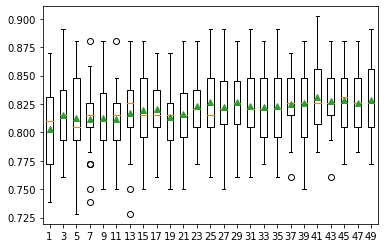

In [76]:
df1 = optimize_knn_imputer(Heart_Disease_DF,'num','cleveland+hungarian+switzerland+va')

In [77]:
df1.loc[df1['MeanAccuracy'] == df1['MeanAccuracy'].max()] 
# getting slightly different result than anwesh

Name     K  MeanAccuracy  stdAccuracy
20  cleveland+hungarian+switzerland+va  41.0      0.830797      0.02788

###**2. KNN imputation on Cleveland + hungarian**

Name     K  MeanAccuracy  stdAccuracy
0   cleveland+hungarian   1.0      0.828578     0.045349
1   cleveland+hungarian   3.0      0.842580     0.037188
2   cleveland+hungarian   5.0      0.836460     0.050357
3   cleveland+hungarian   7.0      0.835904     0.047590
4   cleveland+hungarian   9.0      0.830829     0.044375
5   cleveland+hungarian  11.0      0.839793     0.037679
6   cleveland+hungarian  13.0      0.839774     0.042380
7   cleveland+hungarian  15.0      0.838653     0.037197
8   cleveland+hungarian  17.0      0.835885     0.039690
9   cleveland+hungarian  19.0      0.839237     0.041133
10  cleveland+hungarian  21.0      0.834793     0.039633
11  cleveland+hungarian  23.0      0.835904     0.044505
12  cleveland+hungarian  25.0      0.841460     0.041719
13  cleveland+hungarian  27.0      0.840913     0.043784
14  cleveland+hungarian  29.0      0.831422     0.045935
15  cleveland+hungarian  31.0      0.839774     0.042971
16  cleveland+hungarian  33.0      0.840330     0.042619
17  cleveland+hungarian  35.0      0.831412     0.044491
18  cleveland+hungarian  37.0      0.834209     0.041737
19  cleveland+hungarian  39.0      0.834708     0.045279
20  cleveland+hungarian  41.0      0.837514     0.046135
21  cleveland+hungarian  43.0      0.834783     0.041054
22  cleveland+hungarian  45.0      0.830282     0.046520
23  cleveland+hungarian  47.0      0.835320     0.045981
24  cleveland+hungarian  49.0      0.840367     0.042695

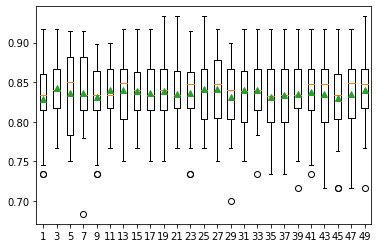

In [78]:
df2 = optimize_knn_imputer(Clev_hung_df,'num','cleveland+hungarian')

In [80]:
df2.loc[df2['MeanAccuracy'] == df2['MeanAccuracy'].max()] 

Name    K  MeanAccuracy  stdAccuracy
1  cleveland+hungarian  3.0       0.84258     0.037188

###**3. KNN imputation on Cleveland + Switzerland**

Name     K  MeanAccuracy  stdAccuracy
0   cleveland+switzerland   1.0      0.821632     0.057639
1   cleveland+switzerland   3.0      0.834958     0.056363
2   cleveland+switzerland   5.0      0.840384     0.050912
3   cleveland+switzerland   7.0      0.850572     0.053750
4   cleveland+switzerland   9.0      0.844278     0.050576
5   cleveland+switzerland  11.0      0.853747     0.055019
6   cleveland+switzerland  13.0      0.858343     0.057142
7   cleveland+switzerland  15.0      0.850609     0.050441
8   cleveland+switzerland  17.0      0.853673     0.047040
9   cleveland+switzerland  19.0      0.849705     0.053830
10  cleveland+switzerland  21.0      0.849742     0.058042
11  cleveland+switzerland  23.0      0.852159     0.056987
12  cleveland+switzerland  25.0      0.847434     0.057716
13  cleveland+switzerland  27.0      0.852086     0.052362
14  cleveland+switzerland  29.0      0.849003     0.052196
15  cleveland+switzerland  31.0      0.845884     0.059446
16  cleveland+switzerland  33.0      0.849760     0.055805
17  cleveland+switzerland  35.0      0.855279     0.048784
18  cleveland+switzerland  37.0      0.852898     0.055808
19  cleveland+switzerland  39.0      0.847434     0.055235
20  cleveland+switzerland  41.0      0.851310     0.053876
21  cleveland+switzerland  43.0      0.852104     0.057455
22  cleveland+switzerland  45.0      0.856054     0.054582
23  cleveland+switzerland  47.0      0.847416     0.056256
24  cleveland+switzerland  49.0      0.853728     0.059194

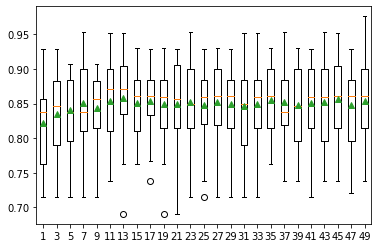

In [81]:
df3 = optimize_knn_imputer(Clev_switz_df,'num','cleveland+switzerland')

In [82]:
df3.loc[df3['MeanAccuracy'] == df3['MeanAccuracy'].max()] 

Name     K  MeanAccuracy  stdAccuracy
6  cleveland+switzerland  13.0      0.858343     0.057142

###**4. KNN imputation on Cleveland + hungarian + switzerland**

Name     K  MeanAccuracy  stdAccuracy
0   cleveland+hungarian+switzerland   1.0      0.825926     0.034533
1   cleveland+hungarian+switzerland   3.0      0.832870     0.038202
2   cleveland+hungarian+switzerland   5.0      0.828241     0.033349
3   cleveland+hungarian+switzerland   7.0      0.831944     0.033707
4   cleveland+hungarian+switzerland   9.0      0.827315     0.030991
5   cleveland+hungarian+switzerland  11.0      0.832407     0.033628
6   cleveland+hungarian+switzerland  13.0      0.838889     0.033372
7   cleveland+hungarian+switzerland  15.0      0.837963     0.036979
8   cleveland+hungarian+switzerland  17.0      0.844444     0.038856
9   cleveland+hungarian+switzerland  19.0      0.840278     0.031823
10  cleveland+hungarian+switzerland  21.0      0.848148     0.038109
11  cleveland+hungarian+switzerland  23.0      0.836574     0.037213
12  cleveland+hungarian+switzerland  25.0      0.839815     0.033970
13  cleveland+hungarian+switzerland  27.0      0.846759     0.037523
14  cleveland+hungarian+switzerland  29.0      0.842130     0.032172
15  cleveland+hungarian+switzerland  31.0      0.847685     0.035948
16  cleveland+hungarian+switzerland  33.0      0.836574     0.035624
17  cleveland+hungarian+switzerland  35.0      0.845370     0.030584
18  cleveland+hungarian+switzerland  37.0      0.840278     0.034907
19  cleveland+hungarian+switzerland  39.0      0.837500     0.037637
20  cleveland+hungarian+switzerland  41.0      0.843519     0.033243
21  cleveland+hungarian+switzerland  43.0      0.844444     0.036289
22  cleveland+hungarian+switzerland  45.0      0.843981     0.035983
23  cleveland+hungarian+switzerland  47.0      0.845370     0.034533
24  cleveland+hungarian+switzerland  49.0      0.843056     0.032700

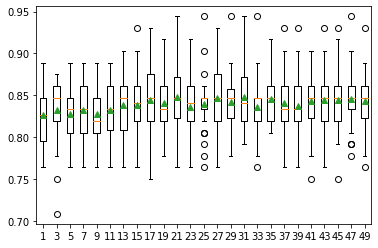

In [83]:
df4 = optimize_knn_imputer(Clev_hung_switz_df,'num','cleveland+hungarian+switzerland')

In [84]:
df4.loc[df4['MeanAccuracy'] == df4['MeanAccuracy'].max()] 

Name     K  MeanAccuracy  stdAccuracy
10  cleveland+hungarian+switzerland  21.0      0.848148     0.038109

###**5. KNN imputation on Cleveland**

Name     K  MeanAccuracy  stdAccuracy
0   cleveland   1.0      0.814086     0.055967
1   cleveland   3.0      0.810789     0.056265
2   cleveland   5.0      0.827240     0.048197
3   cleveland   7.0      0.822867     0.049493
4   cleveland   9.0      0.825269     0.052510
5   cleveland  11.0      0.821613     0.056724
6   cleveland  13.0      0.820573     0.055298
7   cleveland  15.0      0.819498     0.060675
8   cleveland  17.0      0.816308     0.054730
9   cleveland  19.0      0.825054     0.050501
10  cleveland  21.0      0.826093     0.053595
11  cleveland  23.0      0.820824     0.050457
12  cleveland  25.0      0.826093     0.054702
13  cleveland  27.0      0.817455     0.054014
14  cleveland  29.0      0.820717     0.056203
15  cleveland  31.0      0.820573     0.051306
16  cleveland  33.0      0.819642     0.058061
17  cleveland  35.0      0.822867     0.054857
18  cleveland  37.0      0.821828     0.058411
19  cleveland  39.0      0.825233     0.055465
20  cleveland  41.0      0.818423     0.057074
21  cleveland  43.0      0.825197     0.048611
22  cleveland  45.0      0.827204     0.052465
23  cleveland  47.0      0.825054     0.050733
24  cleveland  49.0      0.825018     0.051496

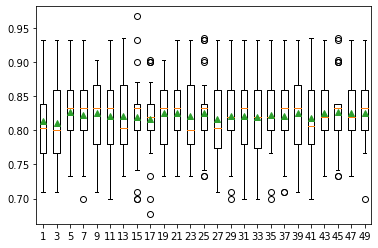

In [85]:
df5 = optimize_knn_imputer(cleveland_df,'num','cleveland')

In [86]:
df5.loc[df5['MeanAccuracy'] == df5['MeanAccuracy'].max()] 

Name    K  MeanAccuracy  stdAccuracy
2  cleveland  5.0       0.82724     0.048197

#**Iterative Imputation-**

---



##**Iterative Imputer**

In [87]:
def optimize_IterativeImputer_imputer(data, target,name):

    results = list()
    dict={'Name': [],
          'ImputationOrder' : [],
          'Mean_Accuracy':[],
          'std_Dev':[]
    }
    df=pd.DataFrame(dict)
    for s in ['ascending', 'descending', 'roman', 'arabic', 'random']:
        #imputer = KNNImputer(n_neighbors=s, weights='distance', metric='nan_euclidean')
        imputer = IterativeImputer(imputation_order=s)
        array = data.values
        X = array [:,:-1]
        Y = data[target]
        
        #Converting Target Variables to Binary
        data['num'][data.num >0] = 1
        Y_temp = data['num']

        trans = MinMaxScaler()
        trans_X = trans.fit_transform(X)
        
        X_imputed = imputer.fit_transform(trans_X)
        X_imputed_df = pd.DataFrame(X_imputed, columns=data.drop(target, axis=1).columns)
        
        model = RandomForestClassifier()
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        scores = cross_val_score(model, X_imputed, Y_temp, scoring='accuracy', cv=cv, n_jobs=-1)       
        results.append(scores)
        #print(' %s --> Mean : %.3f --> Std : (%.3f)' % (s, mean(scores), std(scores)))  
        df.loc[len(df.index)] = [name, s, mean(scores), std(scores)] 
    display(df)
    plt.boxplot(results, labels=['ascending', 'descending', 'roman', 'arabic', 'random'], showmeans=True)
    plt.show()
    return df

###**1. Iterative imputation on Cleveland + Hungarian + Switzerland + VA**

Name ImputationOrder  Mean_Accuracy   std_Dev
0  Clevel + Hung + Switz + VA       ascending       0.819928  0.028715
1  Clevel + Hung + Switz + VA      descending       0.820652  0.029801
2  Clevel + Hung + Switz + VA           roman       0.822101  0.030029
3  Clevel + Hung + Switz + VA          arabic       0.815942  0.027915
4  Clevel + Hung + Switz + VA          random       0.823913  0.033841

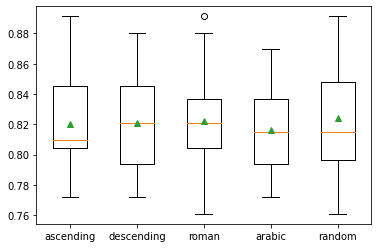

In [88]:
df1_imput=optimize_IterativeImputer_imputer(Heart_Disease_DF,'num','Clevel + Hung + Switz + VA')

In [89]:
# Trying to print the max.. but getting an error.. if you can please feel free to solve it.. aim is to print the best score
df1_imput.loc[df1_imput['Mean_Accuracy'] == df1_imput['Mean_Accuracy'].max()] 

Name ImputationOrder  Mean_Accuracy   std_Dev
4  Clevel + Hung + Switz + VA          random       0.823913  0.033841

###**2. Iterative imputation on Cleveland + Hungarian**

Name ImputationOrder  Mean_Accuracy   std_Dev
0  clev+hung       ascending       0.833663  0.042262
1  clev+hung      descending       0.831422  0.045403
2  clev+hung           roman       0.832006  0.040070
3  clev+hung          arabic       0.832006  0.041224
4  clev+hung          random       0.830348  0.046210

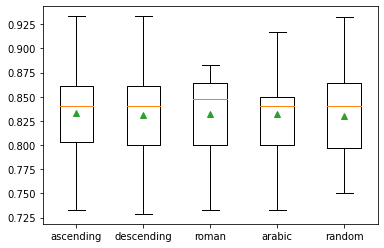

In [90]:
df2_imput=optimize_IterativeImputer_imputer(Clev_hung_df,'num','clev+hung')

In [91]:
df2_imput.loc[df2_imput['Mean_Accuracy'] == df2_imput['Mean_Accuracy'].max()] 

Name ImputationOrder  Mean_Accuracy   std_Dev
0  clev+hung       ascending       0.833663  0.042262

###**3. Iterative imputation on Cleveland + Switzerland**

Name ImputationOrder  Mean_Accuracy   std_Dev
0  Clev+Switz       ascending       0.849022  0.051042
1  Clev+Switz      descending       0.847361  0.053822
2  Clev+Switz           roman       0.850535  0.051944
3  Clev+Switz          arabic       0.843540  0.057164
4  Clev+Switz          random       0.847471  0.056564

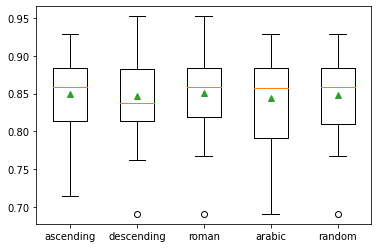

In [92]:
df3_imput = optimize_IterativeImputer_imputer(Clev_switz_df,'num','Clev+Switz')

In [93]:
df3_imput.loc[df3_imput['Mean_Accuracy'] == df3_imput['Mean_Accuracy'].max()] 

Name ImputationOrder  Mean_Accuracy   std_Dev
2  Clev+Switz           roman       0.850535  0.051944

###**4. Iterative imputation on Cleveland + Hungarian + Switzerland**

Name ImputationOrder  Mean_Accuracy   std_Dev
0  Cleve+Hung+Switz       ascending       0.837500  0.031294
1  Cleve+Hung+Switz      descending       0.839815  0.031001
2  Cleve+Hung+Switz           roman       0.837963  0.030709
3  Cleve+Hung+Switz          arabic       0.837500  0.034796
4  Cleve+Hung+Switz          random       0.836574  0.032609

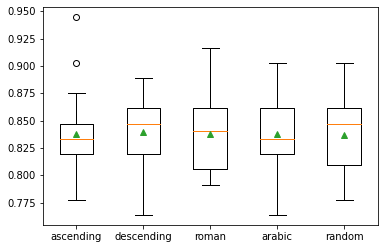

In [94]:
df4_imput=optimize_IterativeImputer_imputer(Clev_hung_switz_df,'num','Cleve+Hung+Switz')

In [95]:
df4_imput.loc[df4_imput['Mean_Accuracy'] == df4_imput['Mean_Accuracy'].max()] 

Name ImputationOrder  Mean_Accuracy   std_Dev
1  Cleve+Hung+Switz      descending       0.839815  0.031001

###**5. Iterative imputation on Cleveland**

Name ImputationOrder  Mean_Accuracy   std_Dev
0  Cleveland       ascending       0.825161  0.053760
1  Cleveland      descending       0.821756  0.055057
2  Cleveland           roman       0.820681  0.057013
3  Cleveland          arabic       0.825018  0.054254
4  Cleveland          random       0.818530  0.048610

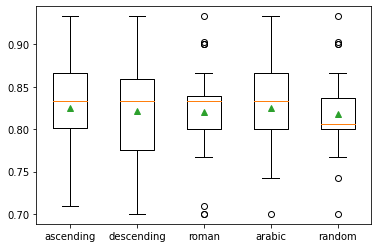

In [96]:
df5_imput=optimize_IterativeImputer_imputer(cleveland_df,'num','Cleveland')

In [97]:
df5_imput.loc[df5_imput['Mean_Accuracy'] == df5_imput['Mean_Accuracy'].max()] 

Name ImputationOrder  Mean_Accuracy  std_Dev
0  Cleveland       ascending       0.825161  0.05376

## **Final KNN Imputation results**

---



####**Printing a Dataframe for KNN imputer results**

In [98]:
df1_max = df1.loc[df1.sort_values(by='K', ascending=False)['MeanAccuracy'] == df1.sort_values(by='K', ascending=False)['MeanAccuracy'].max()] 
df2_max = df2.loc[df2.sort_values(by='K', ascending=False)['MeanAccuracy'] == df2.sort_values(by='K', ascending=False)['MeanAccuracy'].max()] 
df3_max  = df3.loc[df3.sort_values(by='K', ascending=False)['MeanAccuracy'] == df3.sort_values(by='K', ascending=False)['MeanAccuracy'].max()] 
df4_max  = df4.loc[df4.sort_values(by='K', ascending=False)['MeanAccuracy'] == df4.sort_values(by='K', ascending=False)['MeanAccuracy'].max()] 
df5_max  = df5.loc[df5.sort_values(by='K', ascending=False)['MeanAccuracy'] == df5.sort_values(by='K', ascending=False)['MeanAccuracy'].max()] 

Optimum_df = pd.concat([df1_max,df2_max,df3_max,df4_max,df5_max])
Optimum_df.reset_index().sort_values(by='MeanAccuracy', ascending=False, na_position='first')

index                                Name     K  MeanAccuracy  stdAccuracy
2      6               cleveland+switzerland  13.0      0.858343     0.057142
3     10     cleveland+hungarian+switzerland  21.0      0.848148     0.038109
1      1                 cleveland+hungarian   3.0      0.842580     0.037188
0     20  cleveland+hungarian+switzerland+va  41.0      0.830797     0.027880
4      2                           cleveland   5.0      0.827240     0.048197

####**Printing a Dataframe for Iterative imputer results**

In [99]:
df1_imput_max = df1_imput.loc[df1_imput.sort_values(by='ImputationOrder', ascending=False)['Mean_Accuracy'] == df1_imput.sort_values(by='ImputationOrder', ascending=False)['Mean_Accuracy'].max()] 
df2_imput_max = df2_imput.loc[df2_imput.sort_values(by='ImputationOrder', ascending=False)['Mean_Accuracy'] == df2_imput.sort_values(by='ImputationOrder', ascending=False)['Mean_Accuracy'].max()] 
df3_imput_max  = df3_imput.loc[df3_imput.sort_values(by='ImputationOrder', ascending=False)['Mean_Accuracy'] == df3_imput.sort_values(by='ImputationOrder', ascending=False)['Mean_Accuracy'].max()] 
df4_imput_max  = df4_imput.loc[df4_imput.sort_values(by='ImputationOrder', ascending=False)['Mean_Accuracy'] == df4_imput.sort_values(by='ImputationOrder', ascending=False)['Mean_Accuracy'].max()] 
df5_imput_max  = df5_imput.loc[df5_imput.sort_values(by='ImputationOrder', ascending=False)['Mean_Accuracy'] == df5_imput.sort_values(by='ImputationOrder', ascending=False)['Mean_Accuracy'].max()] 

Optimum_df_imput = pd.concat([df1_imput_max,df2_imput_max,df3_imput_max,df4_imput_max,df5_imput_max])
Optimum_df_imput.reset_index().sort_values(by='Mean_Accuracy', ascending=False, na_position='first')

index                        Name ImputationOrder  Mean_Accuracy   std_Dev
2      2                  Clev+Switz           roman       0.850535  0.051944
3      1            Cleve+Hung+Switz      descending       0.839815  0.031001
1      0                   clev+hung       ascending       0.833663  0.042262
4      0                   Cleveland       ascending       0.825161  0.053760
0      4  Clevel + Hung + Switz + VA          random       0.823913  0.033841

###**Final Imputed Dataset:** 
Imputation with KNN mean accuracy is higher with smallest std_dev.. so we will select the final imputed dataset Cleveland+Switzerland+Hungarian--- with K=3.

In [100]:
# function to convert the  imputation results in a dataframe
def Final_Dataset_Prep(data, target , K):
    imputer = KNNImputer(n_neighbors=K, weights='distance', metric='nan_euclidean')
    array = data.values
    X = array[:,:-1]
    trans = MinMaxScaler()
    trans_X = trans.fit_transform(X)   
    X_imputed = imputer.fit_transform(trans_X)
    X_imputed_df = pd.DataFrame(X_imputed, columns=data.drop(target, axis=1).columns)

    data['num'][data.num >0] = 1
    Y_temp = data['num']
    Final_Dataset = pd.concat([d.reset_index(drop=True) for d in [X_imputed_df, Y_temp]], axis=1)
    return Final_Dataset

In [101]:
# createing the final imputed dataset for the project (combining Cleveland, Hungarian, and Switzerland)
data = Clev_hung_switz_df
target = 'num'
K = 3

Final_DF = Final_Dataset_Prep(data,target,K)

In [102]:
Final_DF.head(100)

age  sex        cp  trestbps  ...  slope        ca  thal  num
0   0.714286  1.0  0.000000  0.541667  ...    1.0  0.000000  0.75    0
1   0.795918  1.0  1.000000  0.666667  ...    0.5  1.000000  0.00    1
2   0.795918  1.0  1.000000  0.333333  ...    0.5  0.666667  1.00    1
3   0.183673  1.0  0.666667  0.416667  ...    1.0  0.000000  0.00    0
4   0.265306  0.0  0.333333  0.416667  ...    0.0  0.000000  0.00    0
..       ...  ...       ...       ...  ...    ...       ...   ...  ...
95  0.489796  1.0  1.000000  0.400000  ...    0.0  0.333333  1.00    1
96  0.632653  1.0  1.000000  0.250000  ...    0.5  0.333333  1.00    1
97  0.653061  0.0  1.000000  0.583333  ...    0.5  0.666667  1.00    1
98  0.489796  1.0  0.333333  0.450000  ...    0.0  0.333333  0.00    0
99  0.408163  1.0  1.000000  0.350000  ...    0.0  0.000000  0.00    0

[100 rows x 14 columns]

In [103]:
Final_DF.shape

(720, 14)

In [104]:
#checking for the missing values in the final dataset
final_df_nan = pd.DataFrame(Final_DF.isnull().sum())
final_df_nan

0
age       0
sex       0
cp        0
trestbps  0
chol      0
fbs       0
restecg   0
thalach   0
exang     0
oldpeak   0
slope     0
ca        0
thal      0
num       0

**Missing values:** No missing values in the final dataset

In [105]:
#checking duplicate rows in final dataset:
dups_final_df=Final_DF.duplicated()
print(dups_final_df.any())
print(Final_DF[dups_final_df])

True
          age  sex        cp  trestbps  ...     slope   ca  thal  num
405  0.428571  0.0  0.333333  0.250000  ...  0.134378  0.0   0.0    0
599  0.142857  1.0  1.000000  0.333333  ...  0.500000  0.0   1.0    1

[2 rows x 14 columns]


**Duplicte rows**: there is a one duplicate row so we can remove it.

In [106]:
# deleting the duplicate rows from the final dataset

In [107]:
# drops the duplicate and inplace will save changes in the same file
Final_DF.drop_duplicates(inplace=True)
Final_DF.shape

(718, 14)

In [108]:
Final_DF

age  sex        cp  trestbps  ...  slope        ca      thal  num
0    0.714286  1.0  0.000000  0.541667  ...    1.0  0.000000  0.750000    0
1    0.795918  1.0  1.000000  0.666667  ...    0.5  1.000000  0.000000    1
2    0.795918  1.0  1.000000  0.333333  ...    0.5  0.666667  1.000000    1
3    0.183673  1.0  0.666667  0.416667  ...    1.0  0.000000  0.000000    0
4    0.265306  0.0  0.333333  0.416667  ...    0.0  0.000000  0.000000    0
..        ...  ...       ...       ...  ...    ...       ...       ...  ...
715  0.857143  1.0  1.000000  0.291667  ...    0.5  0.445066  1.000000    1
716  0.857143  1.0  1.000000  0.500000  ...    0.5  0.291365  1.000000    1
717  0.897959  1.0  0.666667  0.666667  ...    0.5  0.666667  0.832801    0
718  0.918367  0.0  0.666667  0.666667  ...    0.0  0.000000  0.000000    1
719  0.938776  1.0  0.333333  0.541667  ...    0.0  0.000000  0.258249    1

[718 rows x 14 columns]

In [109]:
Final_DF.to_csv(r'.\Final_Dataset.csv', index = False, header=True)

In [110]:
from google.colab import files
Final_DF.to_csv('Final_imputed.csv') 
files.download('Final_imputed.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#--------------------**Analyze the  imputed data**--------------------------

##**Descriptive analysis of imputed data**
* shape
* describe()
* correlation matrix using "pearson"
* Output class distribution
* skewness of the attributes 



In [111]:
#Shape of the Final imputed datatypes
# age -- original data
Final_DF.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object

In [112]:
#summary of the statisitcs 
from pandas import set_option
set_option('display.width',100)
pd.set_option('precision',3)
Final_DF.describe()

age      sex       cp  trestbps  ...    slope       ca     thal    num
count  718.000  718.000  718.000   718.000  ...  718.000  718.000  718.000  718.0
mean     0.488    0.740    0.727     0.432  ...    0.317    0.201    0.497    0.5
std      0.187    0.439    0.318     0.154  ...    0.270    0.251    0.431    0.5
min      0.000    0.000    0.000     0.000  ...    0.000    0.000    0.000    0.0
25%      0.347    0.000    0.333     0.333  ...    0.000    0.000    0.000    0.0
50%      0.510    1.000    1.000     0.417  ...    0.446    0.109    0.567    0.5
75%      0.612    1.000    1.000     0.500  ...    0.500    0.333    1.000    1.0
max      1.000    1.000    1.000     1.000  ...    1.000    1.000    1.000    1.0

[8 rows x 14 columns]

In [113]:
#correlation between the attributes
from pandas import set_option
#set_option('display.width')
pd.set_option('precision',3)

print(Final_DF.corr(method='pearson'))

            age    sex     cp  trestbps  ...  slope     ca   thal    num
age       1.000 -0.026  0.162     0.251  ...  0.203  0.384  0.201  0.246
sex      -0.026  1.000  0.152    -0.011  ...  0.085  0.158  0.401  0.295
cp        0.162  0.152  1.000     0.004  ...  0.256  0.277  0.398  0.496
trestbps  0.251 -0.011  0.004     1.000  ...  0.056  0.108  0.106  0.101
chol      0.100 -0.069  0.087     0.100  ...  0.046  0.080  0.048  0.121
fbs       0.170  0.036  0.002     0.128  ...  0.072  0.173  0.084  0.072
restecg   0.234 -0.046  0.009     0.095  ...  0.061  0.168 -0.042  0.070
thalach  -0.338 -0.146 -0.342    -0.115  ... -0.389 -0.297 -0.355 -0.405
exang     0.146  0.155  0.422     0.129  ...  0.350  0.214  0.401  0.460
oldpeak   0.220  0.068  0.243     0.167  ...  0.420  0.303  0.309  0.376
slope     0.203  0.085  0.256     0.056  ...  1.000  0.171  0.345  0.370
ca        0.384  0.158  0.277     0.108  ...  0.171  1.000  0.328  0.447
thal      0.201  0.401  0.398     0.106  ...  0.345

In [114]:
#class distribution to check balanced between two classes
print(Final_DF.groupby('num').size())

num
0    359
1    359
dtype: int64


data is balanced in this dataset

In [115]:
#skew of univariate distribution
skew=Final_DF.skew()
print(skew)

age        -0.120
sex        -1.094
cp         -0.733
trestbps    0.662
chol        1.424
fbs         2.582
restecg     0.942
thalach    -0.335
exang       0.691
oldpeak     1.221
slope       0.379
ca          1.350
thal       -0.049
num         0.000
dtype: float64


#**Data visulization:**

*   Unimodal Data visulization
    * Histogram 
    * Density curve
    * Box plot
*   Multimodal Data visualization
    * Scatter plot
    * Correlation matrix

In [116]:
#Histogram
def plot_hist(variable,df):
    dataset = df 
    sns.set_style('darkgrid')
    plt.figure(figsize = (9,3))
    
    
    sns.histplot(
        df,
        x=variable, hue="num",
        multiple="stack",
        palette="gist_rainbow",
        edgecolor=".3",
        linewidth=.9,
        #log_scale=True,
    )

    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

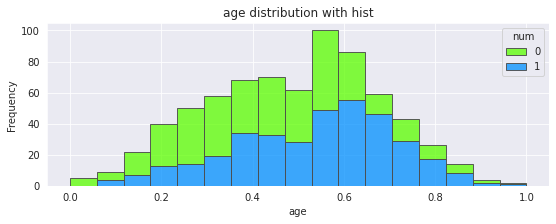

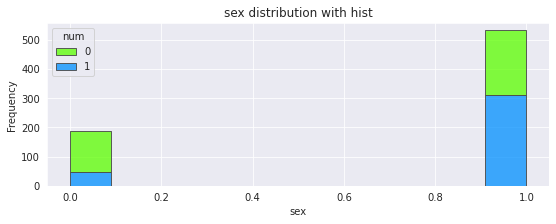

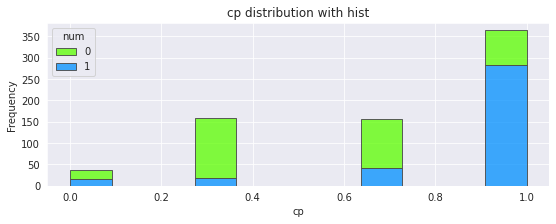

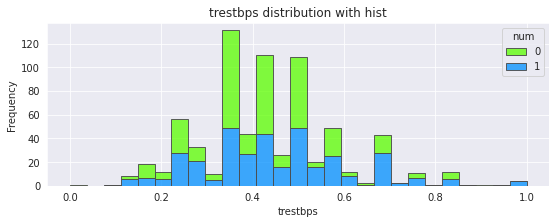

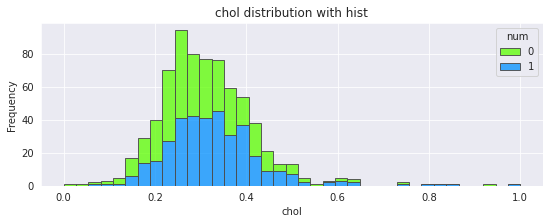

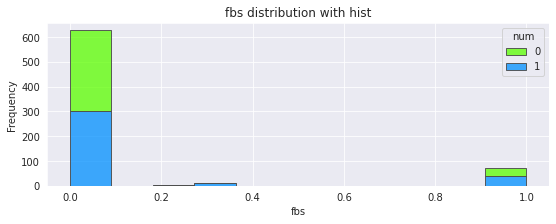

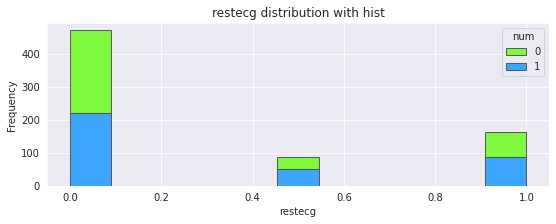

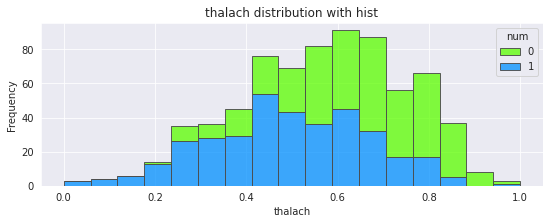

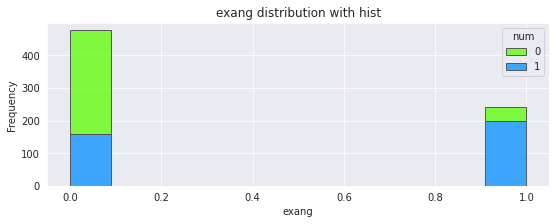

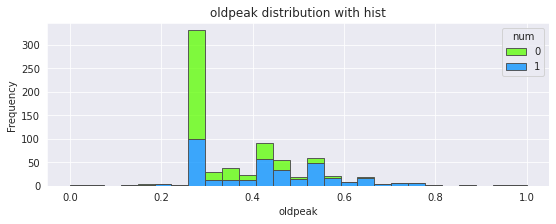

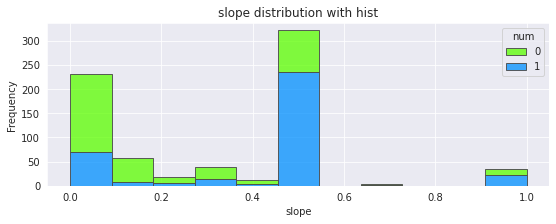

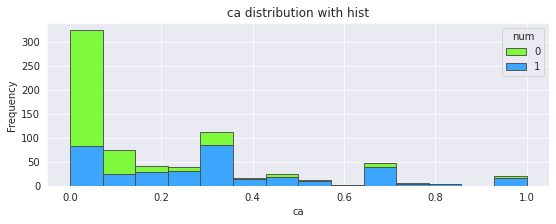

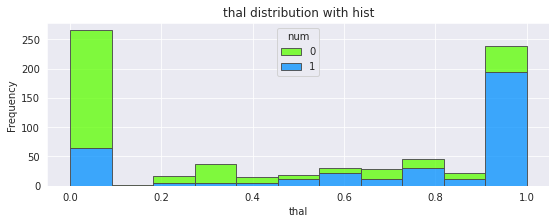

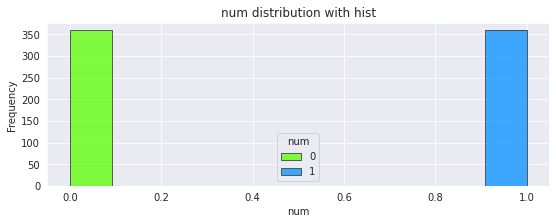

In [117]:
for n in ["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"]:
    plot_hist(n,Final_DF)

In [118]:
def plot_distribution(variable,df):
    dataset = df 
    sns.set_style('darkgrid')
    plt.figure(figsize = (9,3))
    #plt.hist(dataset[variable], bins = 50)
    sns.distplot(df[variable], rug=True, hist=True)
    #sns.distplot(Final_DF[Final_DF['num']==1][variable], rug=True, hist=True, label='1')
    #sns.distplot(Final_DF[Final_DF['num']==0][variable], rug=True, hist=True, label='0')
    plt.legend()
#plt.title('Density plot of age by sex');
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()



No handles with labels found to put in legend.


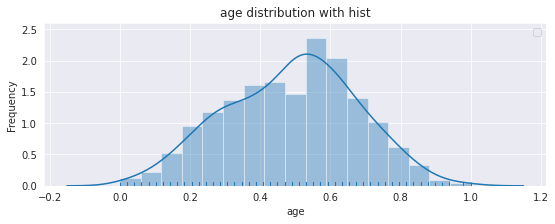

No handles with labels found to put in legend.


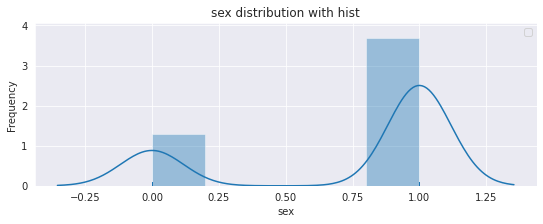

No handles with labels found to put in legend.


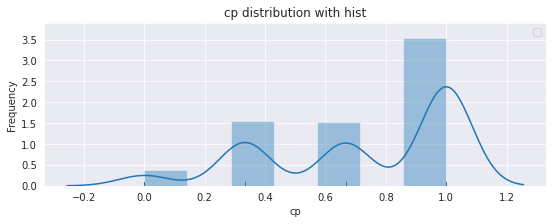

No handles with labels found to put in legend.


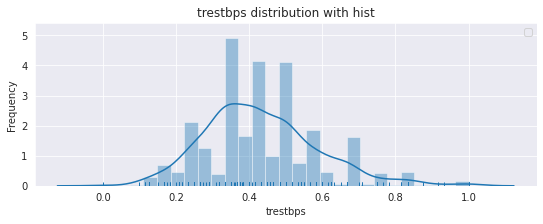

No handles with labels found to put in legend.


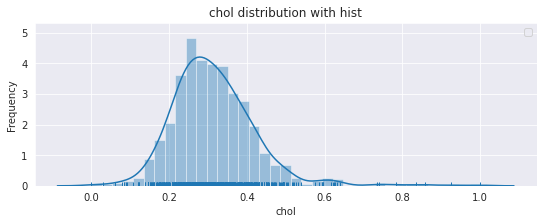

No handles with labels found to put in legend.


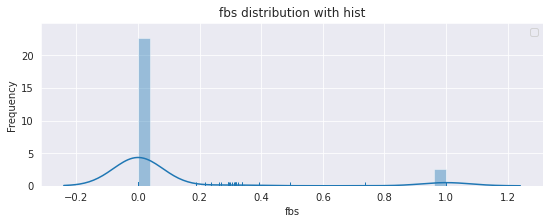

No handles with labels found to put in legend.


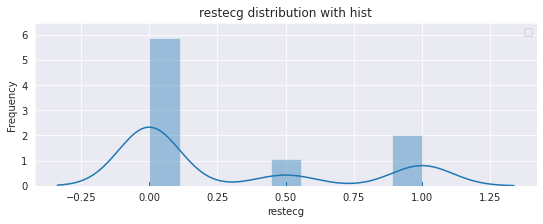

No handles with labels found to put in legend.


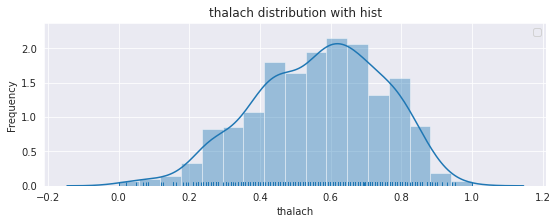

No handles with labels found to put in legend.


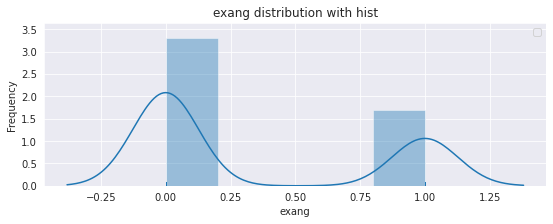

No handles with labels found to put in legend.


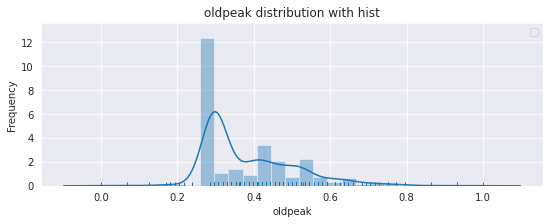

No handles with labels found to put in legend.


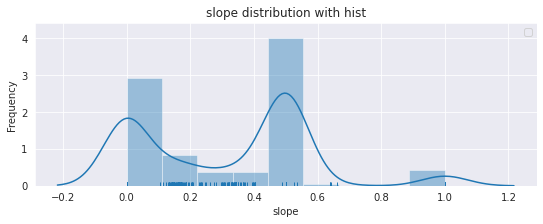

No handles with labels found to put in legend.


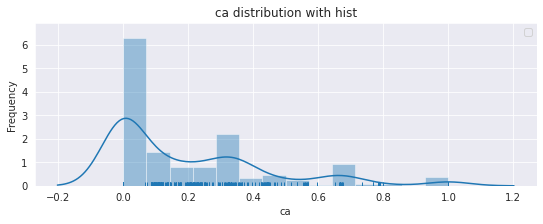

No handles with labels found to put in legend.


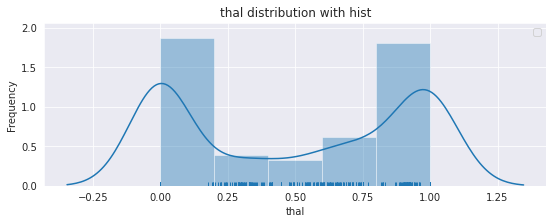

No handles with labels found to put in legend.


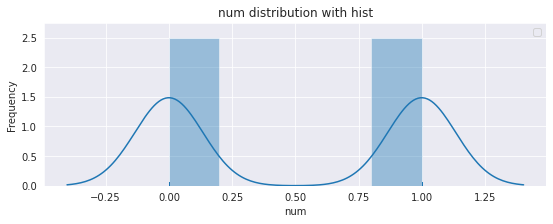

In [119]:
for n in ["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"]:
    plot_distribution(n,Final_DF)

### Data is not normal, but it is balanced from the num.Hence, before modeling we need to rescale or transform the dataset 

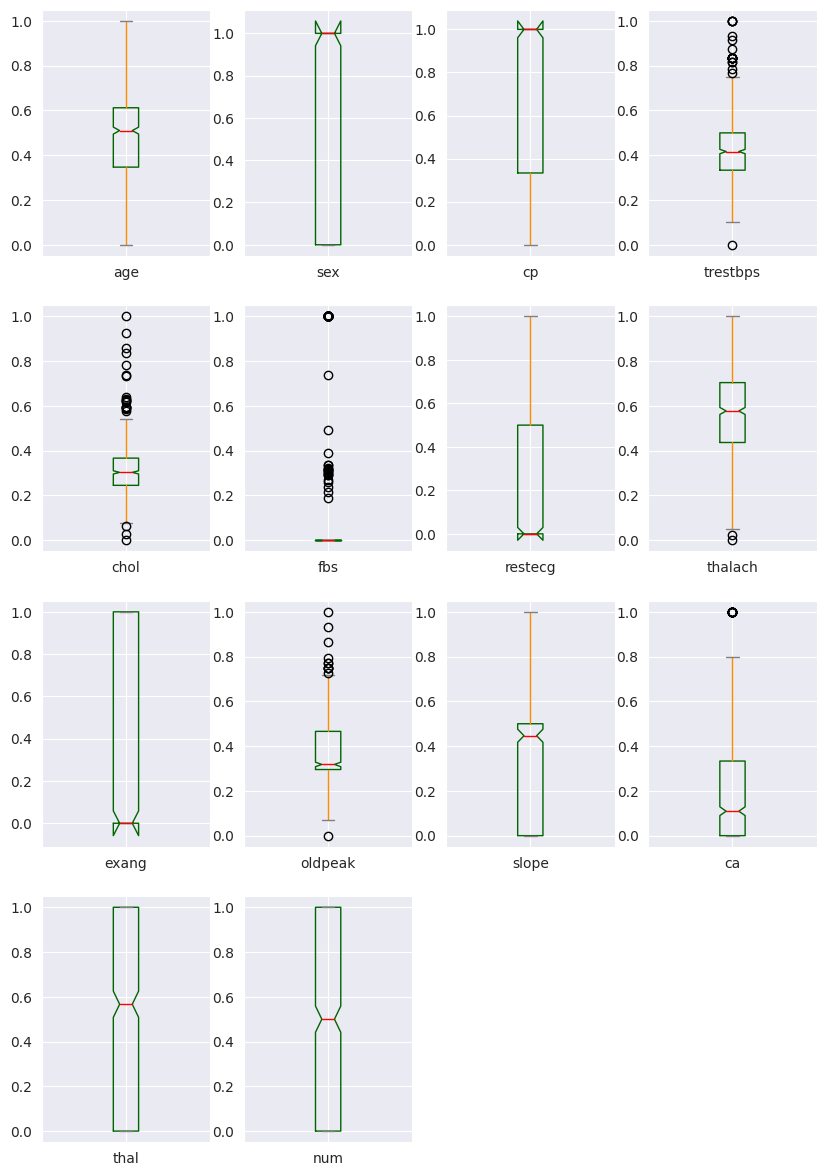

In [120]:
#Box plots
color1 = {
        "boxes": "DarkGreen",
        "whiskers": "DarkOrange",
        "medians": "red",
        "caps": "Gray",
        }
pyplot.rcParams.update({'figure.figsize':(10,15), 'figure.dpi':100})
ax = Final_DF.plot(kind='box',color=color1, subplots=True ,layout=(4,4),sharex=False, sharey=False , notch = True)
pyplot.xticks(fontsize = 16);
pyplot.yticks(fontsize = 4);
pyplot.show()
def boxplot_Matrix(labels, data):
    rows_list = []
    df = plt.boxplot(data,notch = True,labels = labels )
    for i in range(len(labels)):
        dict_Boxplot = {}
        dict_Boxplot['label'] = labels[i]
        dict_Boxplot['lower_whisker'] = df['whiskers'][i*2].get_ydata()[1]
        dict_Boxplot['lower_quartile'] = df['boxes'][i].get_ydata()[1]
        dict_Boxplot['median'] = df['medians'][i].get_ydata()[1]
        dict_Boxplot['upper_quartile'] = df['boxes'][i].get_ydata()[2]
        dict_Boxplot['upper_whisker'] = df['whiskers'][(i*2)+1].get_ydata()[1]
        rows_list.append(dict_Boxplot)

    return pd.DataFrame(rows_list)


### **Multimondal Data visualization**

<Figure size 6000x6000 with 0 Axes>

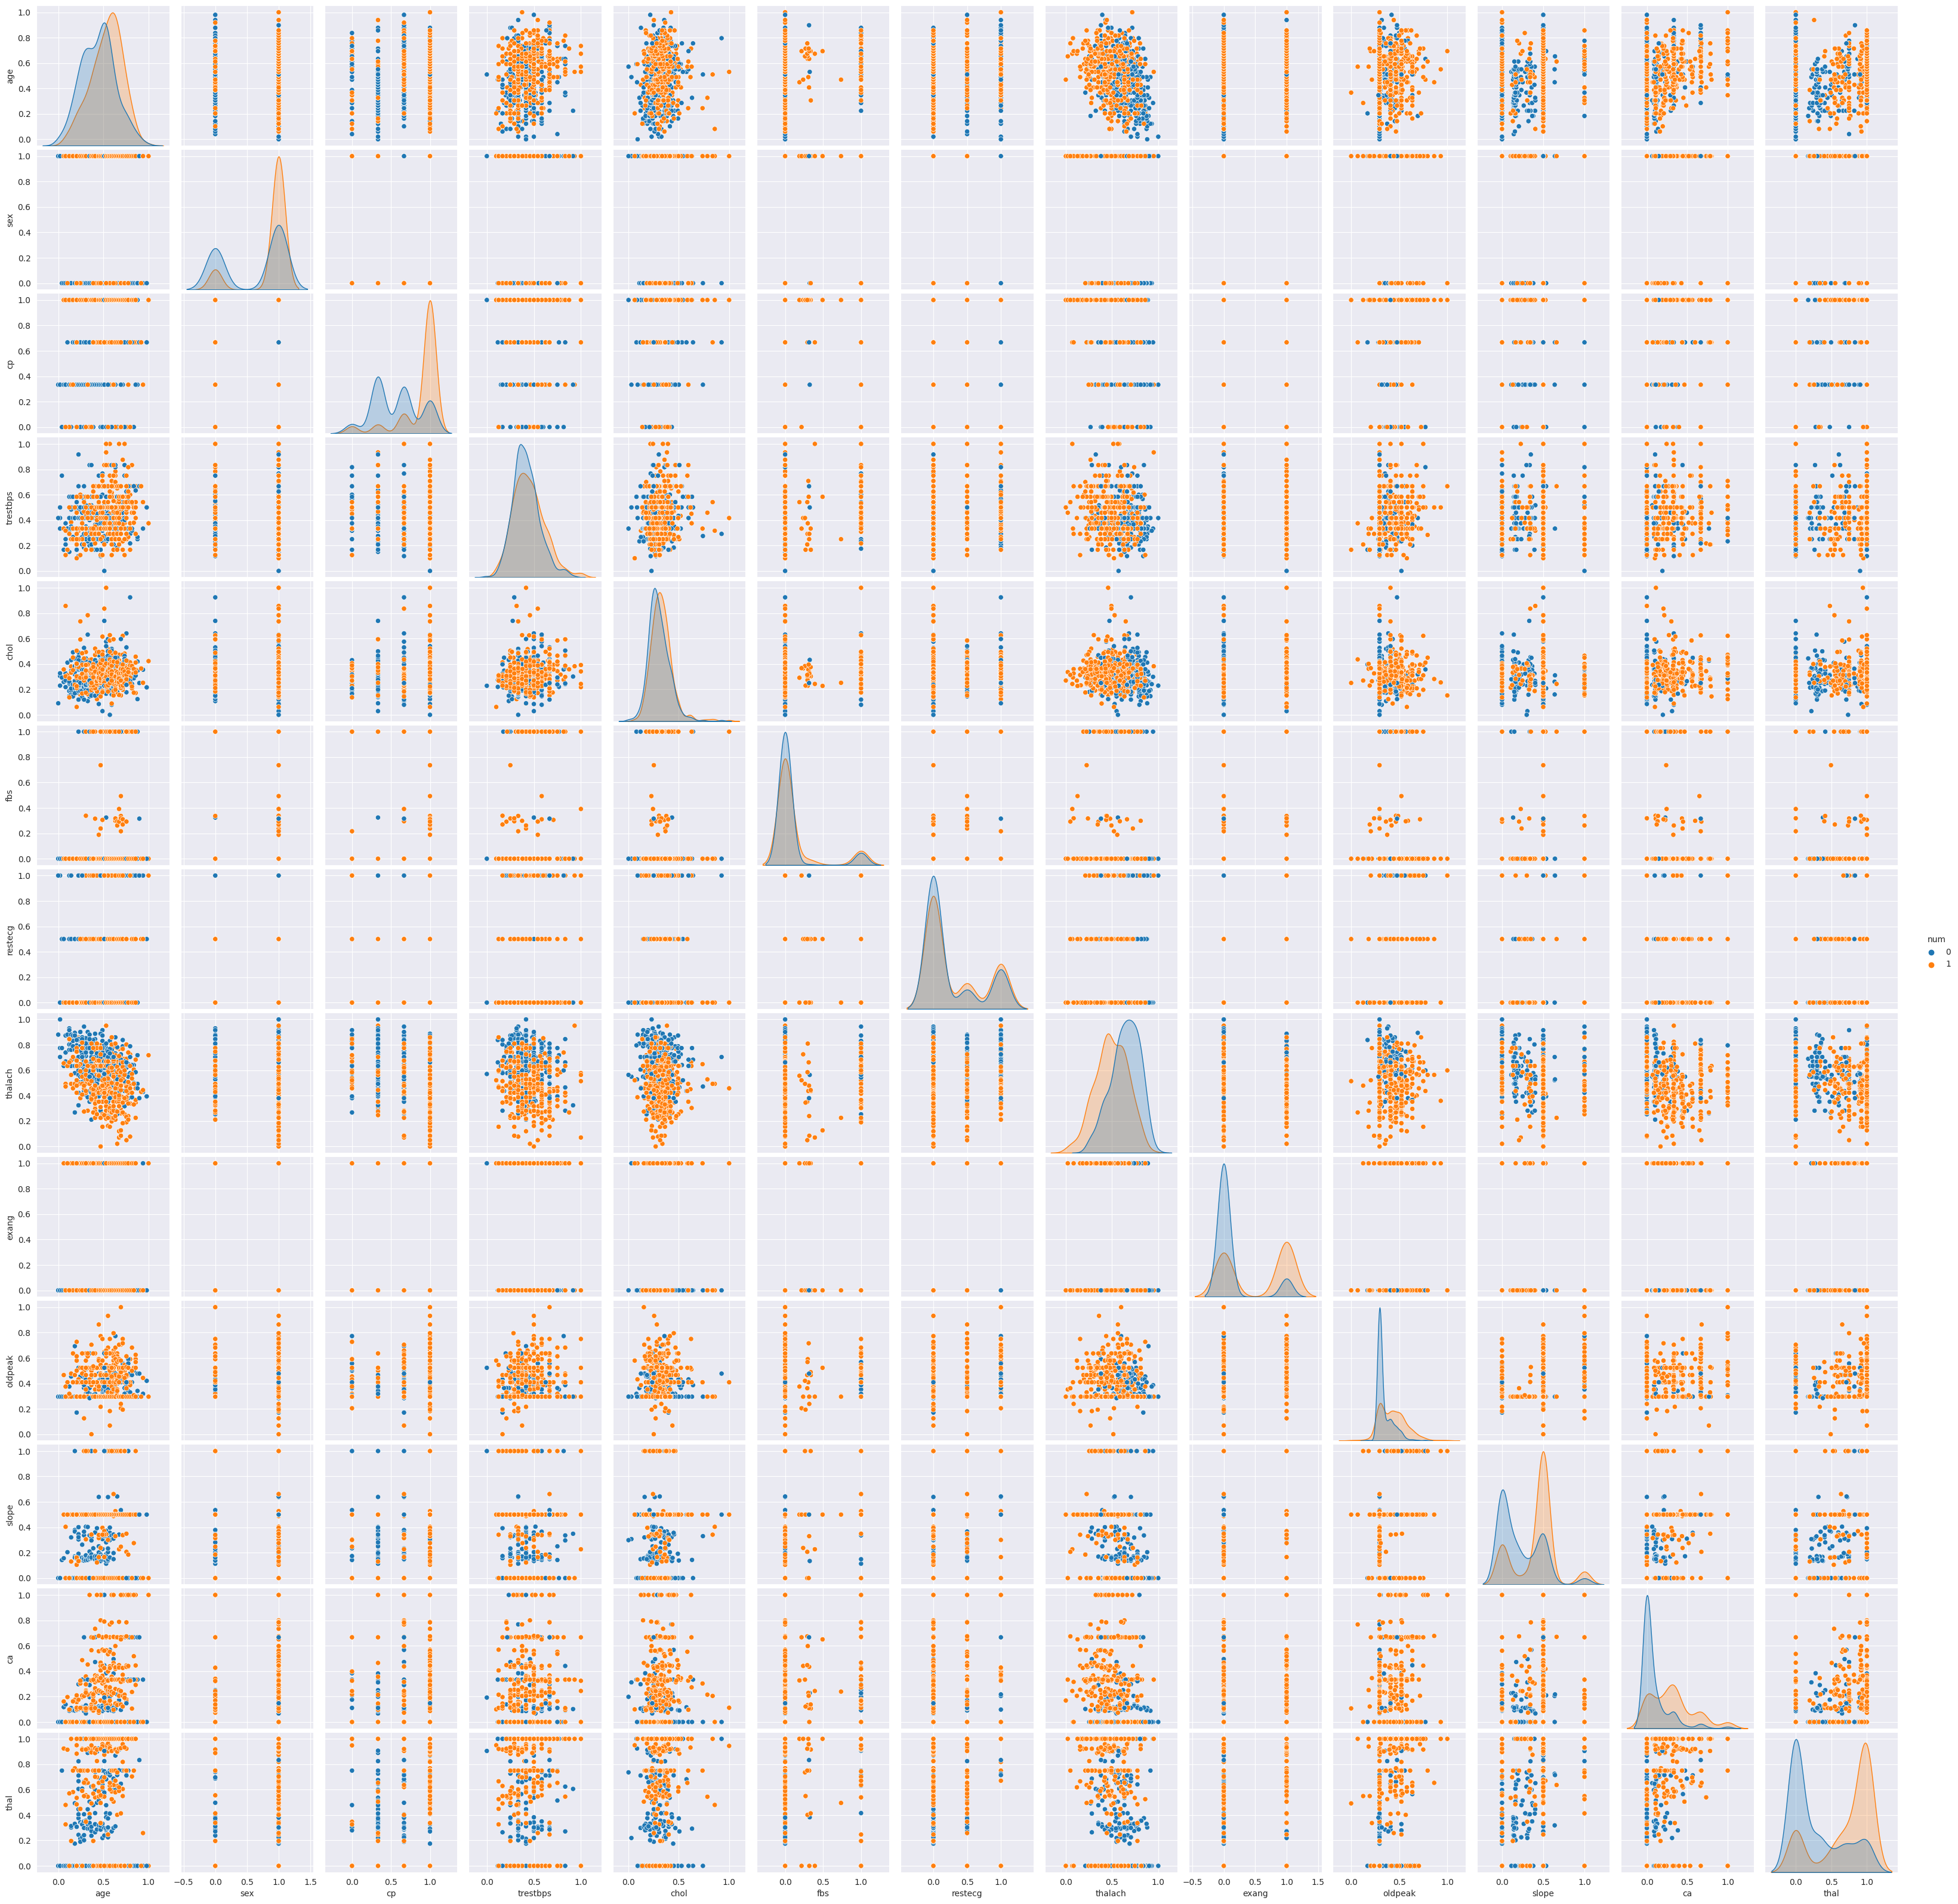

In [121]:
#scatter plot matrix
#orange--- num=1, blue----num=0
plt.figure(figsize=(60,60))
sns.set_style('darkgrid')
sns.pairplot(Final_DF, hue='num')

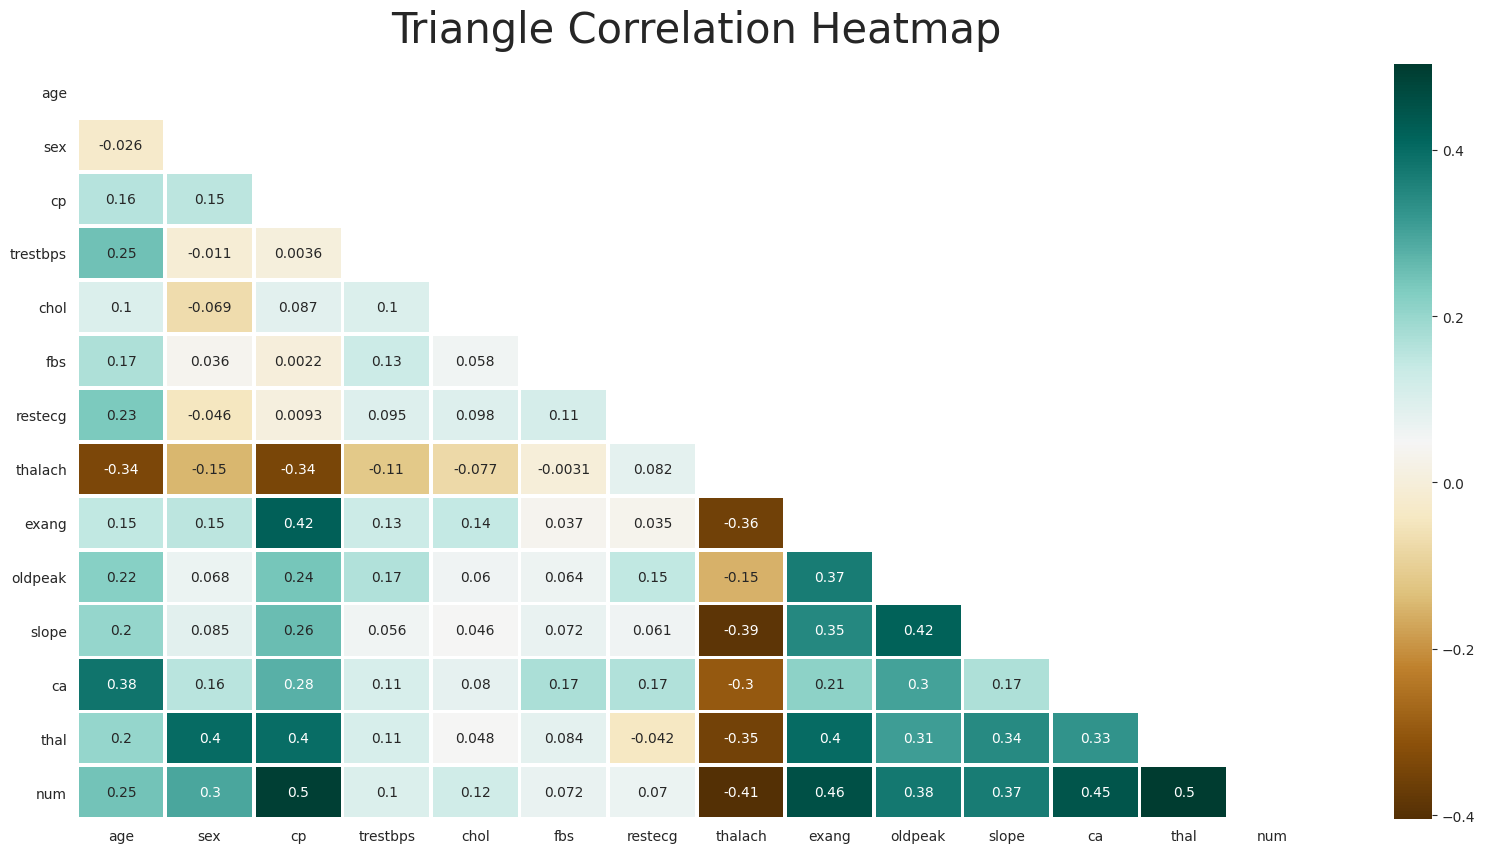

In [122]:
#correlation matrix
plt.figure(figsize=(20, 10))
sns.set_style('white')
mask = np.triu(np.ones_like(Final_DF.corr(), dtype=np.bool))
heatmap = sns.heatmap(Final_DF.corr(), mask=mask,annot=True, cmap='BrBG', linewidths = 2)
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':30}, pad=16);

**Baseline Model**

In [123]:
def Print_Metrics(best_model,y_test,X_test,y_predict_test,X_train,y_train,modelName):
    print('\nModel performance on the test data set:')

    # print('Train Accuracy.......', accuracy_score(y_train, best_model.predict(X_train)))
    # print('Validate Accuracy....', accuracy_score(y_valid, best_model.predict(X_valid)))

    # y_predict_test  = best_model.predict(X_test)
    mse             = metrics.mean_squared_error(y_test, y_predict_test)
    logloss_test    = metrics.log_loss(y_test, y_predict_test)
    #accuracy_train = best_model.score(X_train, y_train)
    accuracy_test   = metrics.accuracy_score(y_test, y_predict_test)
    #accuracy_test2  = best_model.score(X_test, y_test)
    F1_test         = metrics.f1_score(y_test, y_predict_test)
    precision_test  = precision_score(y_test, y_predict_test, average='binary')
    precision_test2 = metrics.precision_score(y_test, y_predict_test)
    recall_test     = recall_score(y_test, y_predict_test, average='binary')
    auc_test        = metrics.roc_auc_score(y_test, y_predict_test)
    r2_test         = metrics.r2_score(y_test, y_predict_test)
   
    #test_auc       = h2o.get_model("best_rf").model_performance(test_data=test).auc()
    #print('Best model performance based on auc: ', test_auc)
    
    header = ["Metric", "Test"]
    table  = [
               ["logloss",   logloss_test],
              # ["Train accuracy", accuracy_train],
               ["Test accuracy",  accuracy_test],
               ["precision", precision_test],
               ["F1",        F1_test],
               ["r2",        r2_test],
               ["AUC",       auc_test]
             ]
    
    result = {
        "logloss" : logloss_test,
        #"Train accuracy": accuracy_train,
        "Test accuracy":accuracy_test,
        "precision": precision_test,
        "F1":F1_test,
        "r2":r2_test,
        "AUC":auc_test
    }

    data = [[modelName, logloss_test,accuracy_test,precision_test,F1_test,r2_test,auc_test]]
    df_result = pd.DataFrame(data, columns = ['ModelName', 'logloss','Test accuracy','precision', 'F1', 'r2', 'AUC'])
    print(tabulate(table, header, tablefmt="fancy_grid"))
    return df_result

In [124]:
def evaluate(model, X_train,y_train, X_test, y_test):
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
    roc_auc = auc(false_positive_rate, true_positive_rate)
   
    plt.figure()
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(false_positive_rate, true_positive_rate, color='darkorange', label='Random Forest')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve (area = %0.2f)' % roc_auc)
    plt.legend(loc='best')
    plt.show()
    
    return roc_auc

In [125]:
def Confusion_Matrix(y_test, y_pred):
    print("Confusion Matrix : ",metrics.confusion_matrix(y_test, y_pred))
    clf_confusion = metrics.confusion_matrix(y_test, y_pred)
    #[row, column]
    TP = clf_confusion[1, 1]
    TN = clf_confusion[0, 0]
    FP = clf_confusion[0, 1]
    FN = clf_confusion[1, 0]

    print("Classification Accuracy : ",(TP + TN) / float(TP + TN + FP + FN))
    print("classification_error : ",(FP + FN) / float(TP + TN + FP + FN))
    print("sensitivity : ",TP / float(FN + TP))
    print("specificity : ",TN / (TN + FP))
    print("false_positive_rate : ",FP / float(TN + FP))
    print("precision : ",TP / float(TP + FP))

In [126]:
def imp_feature(model):
    X_features = ["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal"]
    feature_imp = pd.Series(model.feature_importances_,index=X_features).sort_values(ascending=False)

    sns.barplot(x=feature_imp, y=feature_imp.index)
    # Add labels to your graph
    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title("Visualizing Important Features")
    plt.legend()
    plt.show()

In [127]:
from sklearn.model_selection import train_test_split
y=Final_DF['num'] 
X=Final_DF[["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold

from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics
from tabulate import tabulate

from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier

===========================Logistic Regression : LR================================

Model performance on the test data set:
╒═══════════════╤══════════╕
│ Metric        │     Test │
╞═══════════════╪══════════╡
│ logloss       │ 6.23623  │
├───────────────┼──────────┤
│ Test accuracy │ 0.819444 │
├───────────────┼──────────┤
│ precision     │ 0.838095 │
├───────────────┼──────────┤
│ F1            │ 0.818605 │
├───────────────┼──────────┤
│ r2            │ 0.27753  │
├───────────────┼──────────┤
│ AUC           │ 0.819811 │
╘═══════════════╧══════════╛



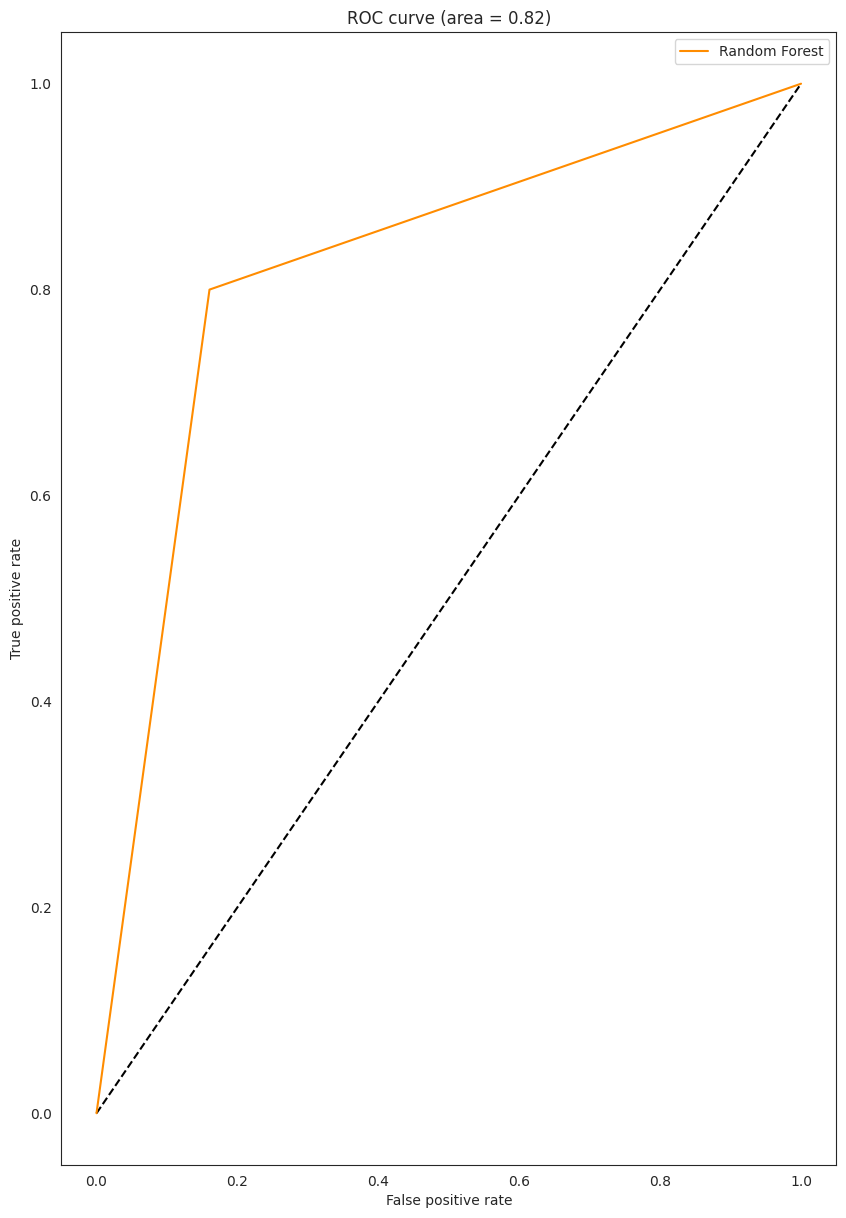

ROC for base model : Logistic Regression : LR : 0.819811320754717

Confusion Matrix : 
Confusion Matrix :  [[89 17]
 [22 88]]
Classification Accuracy :  0.8194444444444444
classification_error :  0.18055555555555555
sensitivity :  0.8
specificity :  0.839622641509434
false_positive_rate :  0.16037735849056603
precision :  0.8380952380952381

Imp Features : 

===========================Linear Discriminant Analysis : LDA ================================

Model performance on the test data set:
╒═══════════════╤══════════╕
│ Metric        │     Test │
╞═══════════════╪══════════╡
│ logloss       │ 6.39614  │
├───────────────┼──────────┤
│ Test accuracy │ 0.814815 │
├───────────────┼──────────┤
│ precision     │ 0.830189 │
├───────────────┼──────────┤
│ F1            │ 0.814815 │
├───────────────┼──────────┤
│ r2            │ 0.259005 │
├───────────────┼──────────┤
│ AUC           │ 0.815094 │
╘═══════════════╧══════════╛



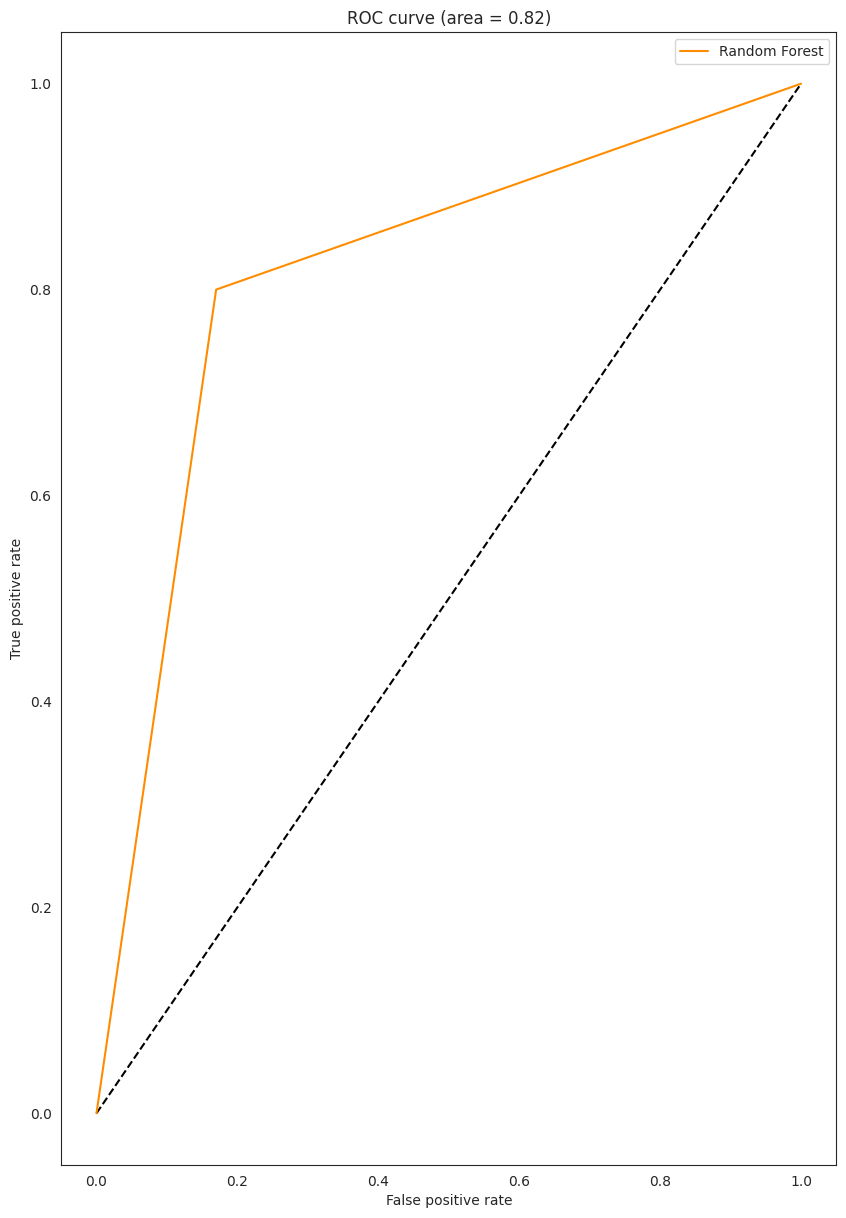

ROC for base model : Linear Discriminant Analysis : LDA  : 0.8150943396226416

Confusion Matrix : 
Confusion Matrix :  [[88 18]
 [22 88]]
Classification Accuracy :  0.8148148148148148
classification_error :  0.18518518518518517
sensitivity :  0.8
specificity :  0.8301886792452831
false_positive_rate :  0.16981132075471697
precision :  0.8301886792452831

Imp Features : 

===========================KNN================================

Model performance on the test data set:
╒═══════════════╤══════════╕
│ Metric        │     Test │
╞═══════════════╪══════════╡
│ logloss       │ 7.03574  │
├───────────────┼──────────┤
│ Test accuracy │ 0.796296 │
├───────────────┼──────────┤
│ precision     │ 0.823529 │
├───────────────┼──────────┤
│ F1            │ 0.792453 │
├───────────────┼──────────┤
│ r2            │ 0.184906 │
├───────────────┼──────────┤
│ AUC           │ 0.796913 │
╘═══════════════╧══════════╛



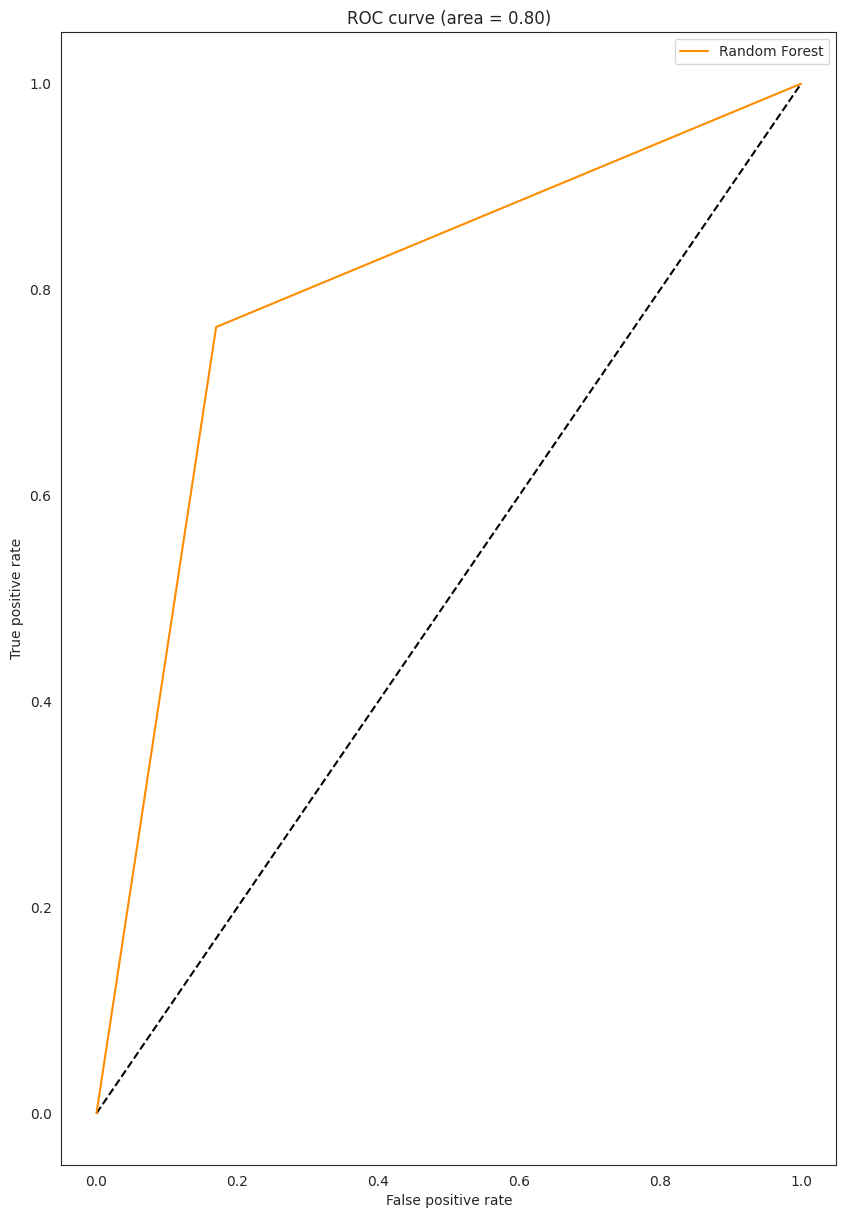

ROC for base model : KNN : 0.7969125214408234

Confusion Matrix : 
Confusion Matrix :  [[88 18]
 [26 84]]
Classification Accuracy :  0.7962962962962963
classification_error :  0.2037037037037037
sensitivity :  0.7636363636363637
specificity :  0.8301886792452831
false_positive_rate :  0.16981132075471697
precision :  0.8235294117647058

Imp Features : 

===========================Decision Tree Classifier================================

Model performance on the test data set:
╒═══════════════╤══════════╕
│ Metric        │     Test │
╞═══════════════╪══════════╡
│ logloss       │ 7.03577  │
├───────────────┼──────────┤
│ Test accuracy │ 0.796296 │
├───────────────┼──────────┤
│ precision     │ 0.784483 │
├───────────────┼──────────┤
│ F1            │ 0.80531  │
├───────────────┼──────────┤
│ r2            │ 0.184906 │
├───────────────┼──────────┤
│ AUC           │ 0.795712 │
╘═══════════════╧══════════╛



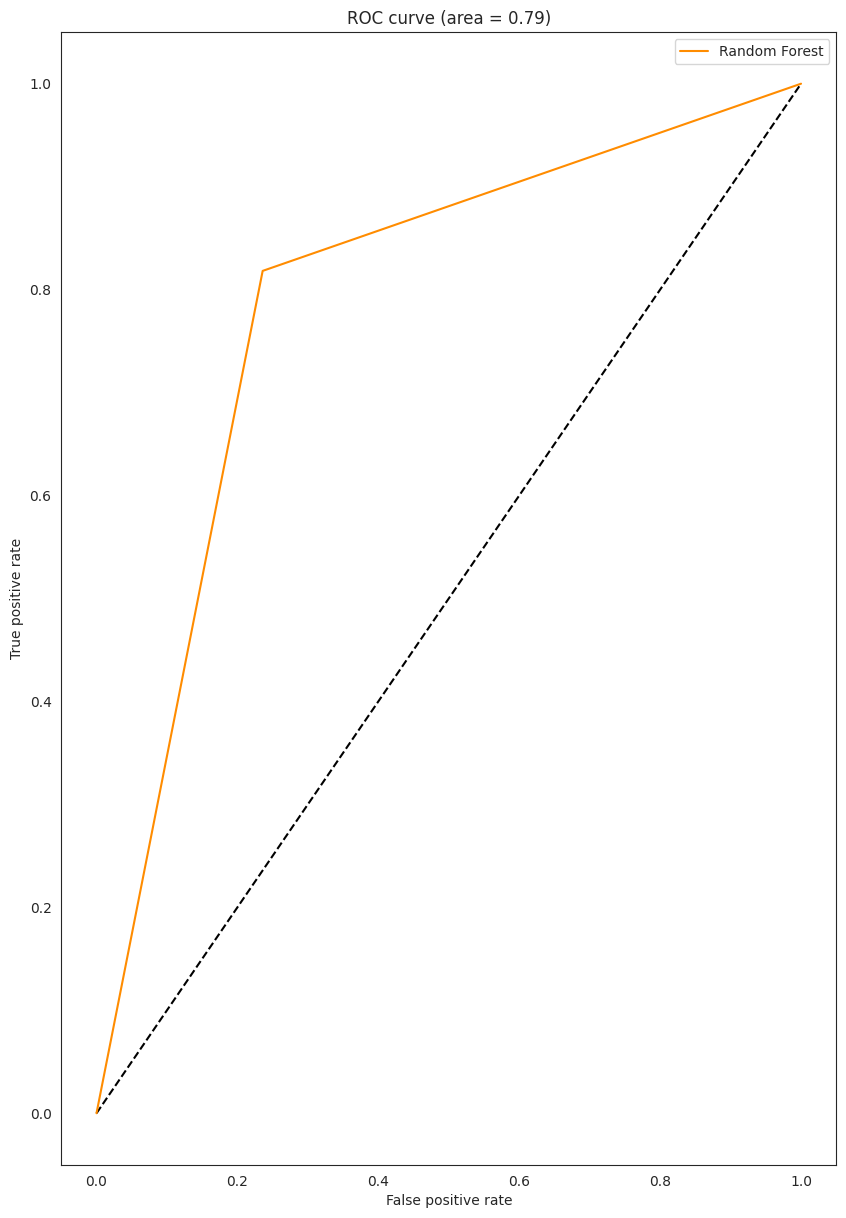

No handles with labels found to put in legend.


ROC for base model : Decision Tree Classifier : 0.7911663807890223

Confusion Matrix : 
Confusion Matrix :  [[81 25]
 [19 91]]
Classification Accuracy :  0.7962962962962963
classification_error :  0.2037037037037037
sensitivity :  0.8272727272727273
specificity :  0.7641509433962265
false_positive_rate :  0.2358490566037736
precision :  0.7844827586206896

Imp Features : 


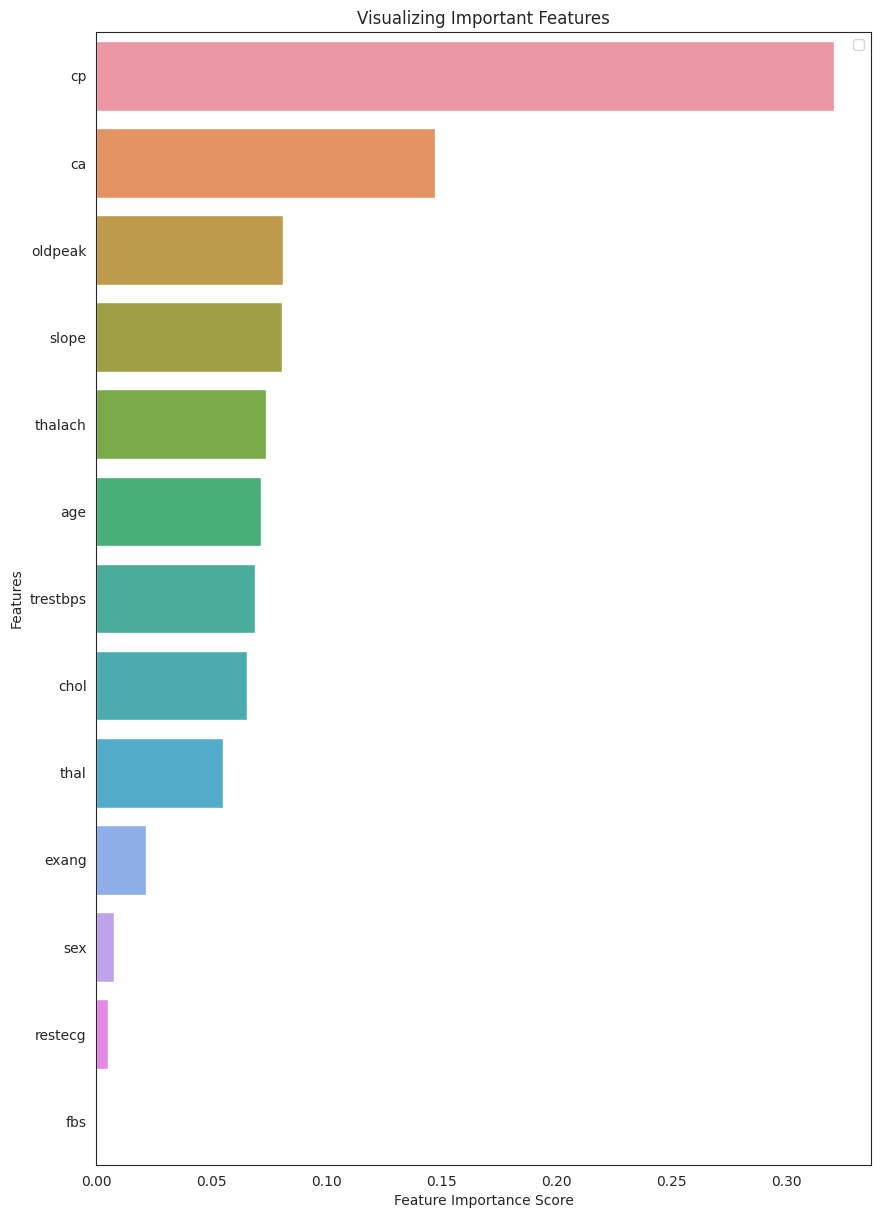

===========================GaussianNB : NB================================

Model performance on the test data set:
╒═══════════════╤══════════╕
│ Metric        │     Test │
╞═══════════════╪══════════╡
│ logloss       │ 7.03575  │
├───────────────┼──────────┤
│ Test accuracy │ 0.796296 │
├───────────────┼──────────┤
│ precision     │ 0.811321 │
├───────────────┼──────────┤
│ F1            │ 0.796296 │
├───────────────┼──────────┤
│ r2            │ 0.184906 │
├───────────────┼──────────┤
│ AUC           │ 0.796569 │
╘═══════════════╧══════════╛



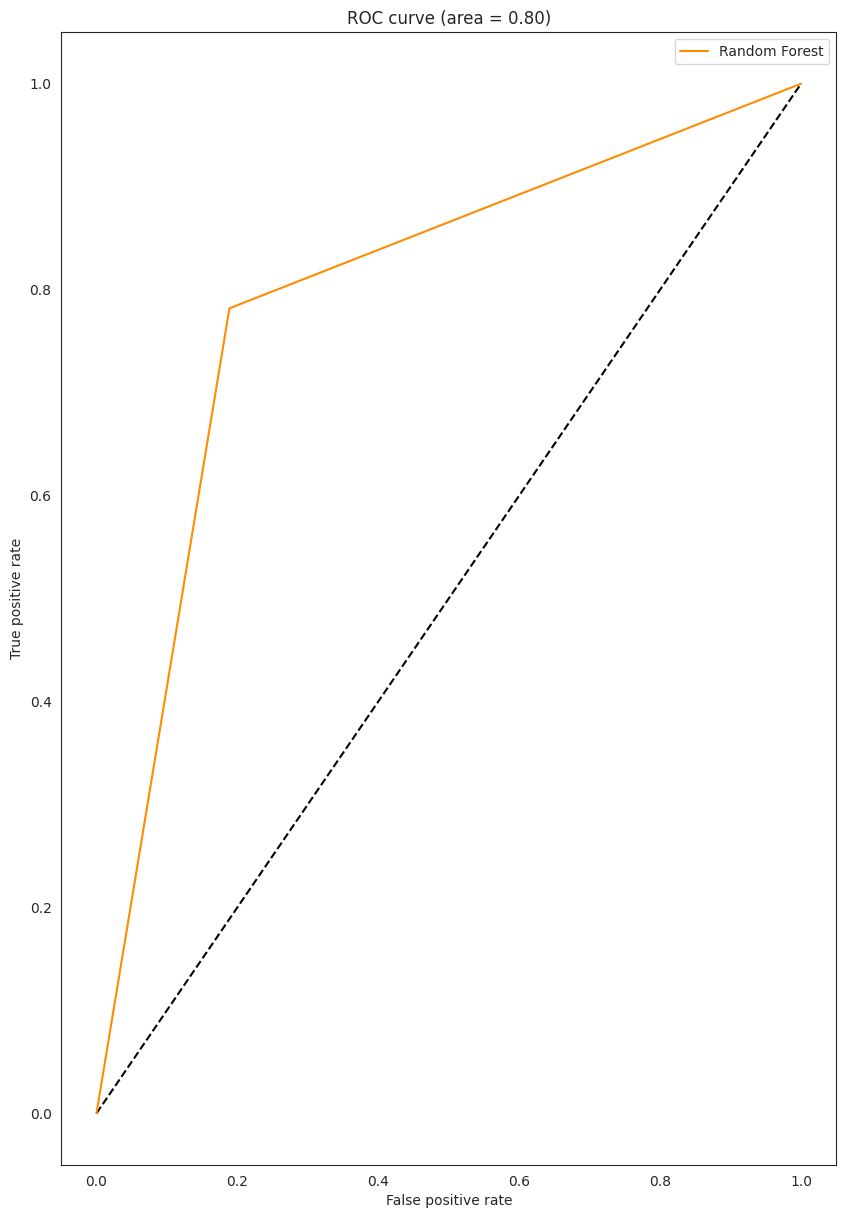

ROC for base model : GaussianNB : NB : 0.7965694682675815

Confusion Matrix : 
Confusion Matrix :  [[86 20]
 [24 86]]
Classification Accuracy :  0.7962962962962963
classification_error :  0.2037037037037037
sensitivity :  0.7818181818181819
specificity :  0.8113207547169812
false_positive_rate :  0.18867924528301888
precision :  0.8113207547169812

Imp Features : 

===========================SVM================================

Model performance on the test data set:
╒═══════════════╤══════════╕
│ Metric        │     Test │
╞═══════════════╪══════════╡
│ logloss       │ 6.07634  │
├───────────────┼──────────┤
│ Test accuracy │ 0.824074 │
├───────────────┼──────────┤
│ precision     │ 0.821429 │
├───────────────┼──────────┤
│ F1            │ 0.828829 │
├───────────────┼──────────┤
│ r2            │ 0.296055 │
├───────────────┼──────────┤
│ AUC           │ 0.823842 │
╘═══════════════╧══════════╛



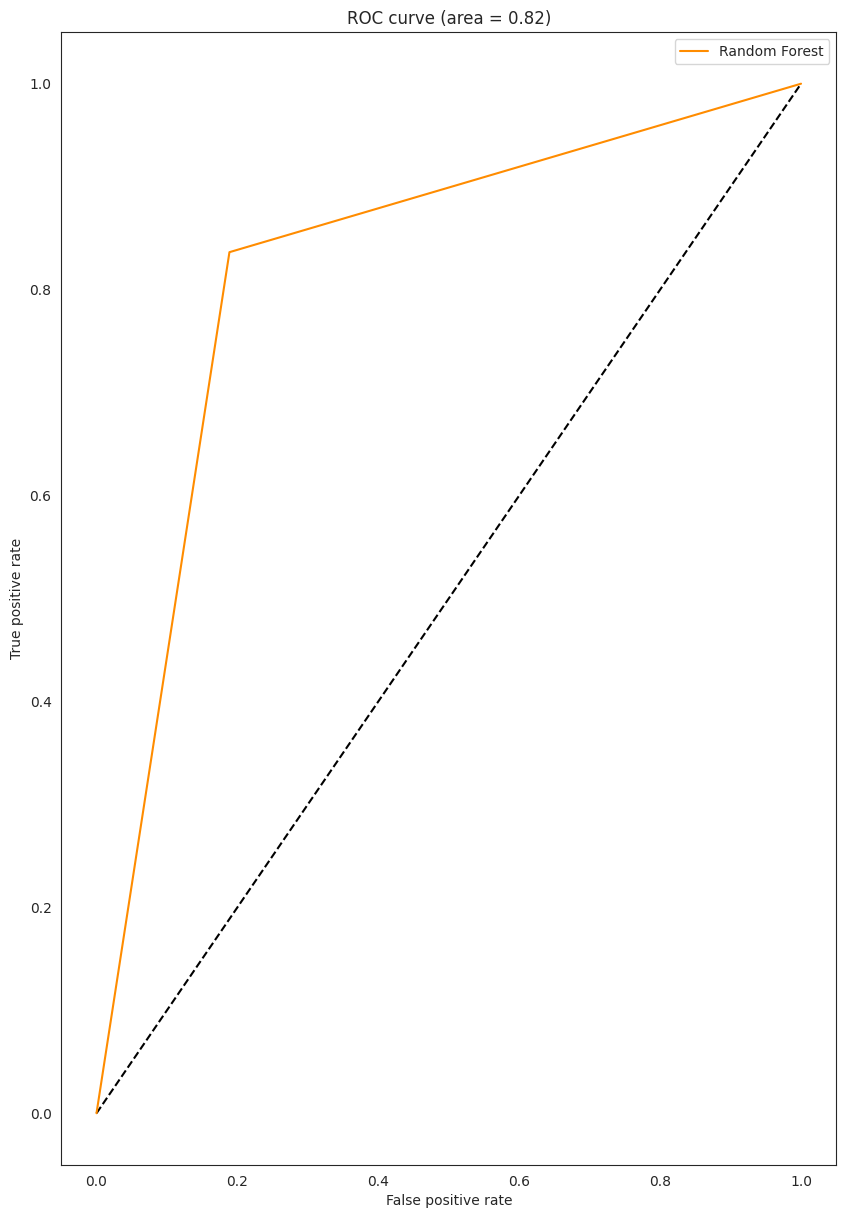

ROC for base model : SVM : 0.8238421955403088

Confusion Matrix : 
Confusion Matrix :  [[86 20]
 [18 92]]
Classification Accuracy :  0.8240740740740741
classification_error :  0.17592592592592593
sensitivity :  0.8363636363636363
specificity :  0.8113207547169812
false_positive_rate :  0.18867924528301888
precision :  0.8214285714285714

Imp Features : 

===========================Random Forest Classifier : RFC================================

Model performance on the test data set:
╒═══════════════╤══════════╕
│ Metric        │     Test │
╞═══════════════╪══════════╡
│ logloss       │ 6.23623  │
├───────────────┼──────────┤
│ Test accuracy │ 0.819444 │
├───────────────┼──────────┤
│ precision     │ 0.831776 │
├───────────────┼──────────┤
│ F1            │ 0.820276 │
├───────────────┼──────────┤
│ r2            │ 0.27753  │
├───────────────┼──────────┤
│ AUC           │ 0.81964  │
╘═══════════════╧══════════╛



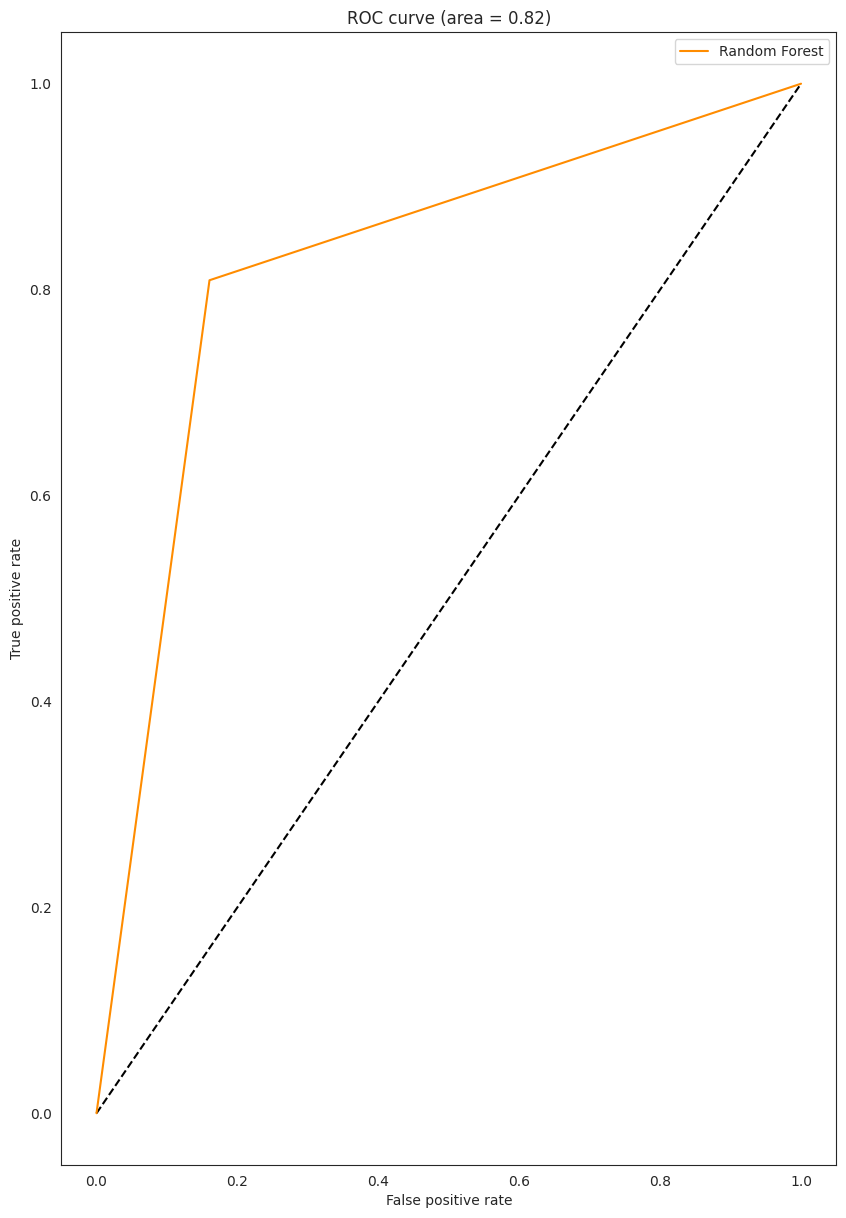

No handles with labels found to put in legend.


ROC for base model : Random Forest Classifier : RFC : 0.8243567753001715

Confusion Matrix : 
Confusion Matrix :  [[88 18]
 [21 89]]
Classification Accuracy :  0.8194444444444444
classification_error :  0.18055555555555555
sensitivity :  0.8090909090909091
specificity :  0.8301886792452831
false_positive_rate :  0.16981132075471697
precision :  0.8317757009345794

Imp Features : 


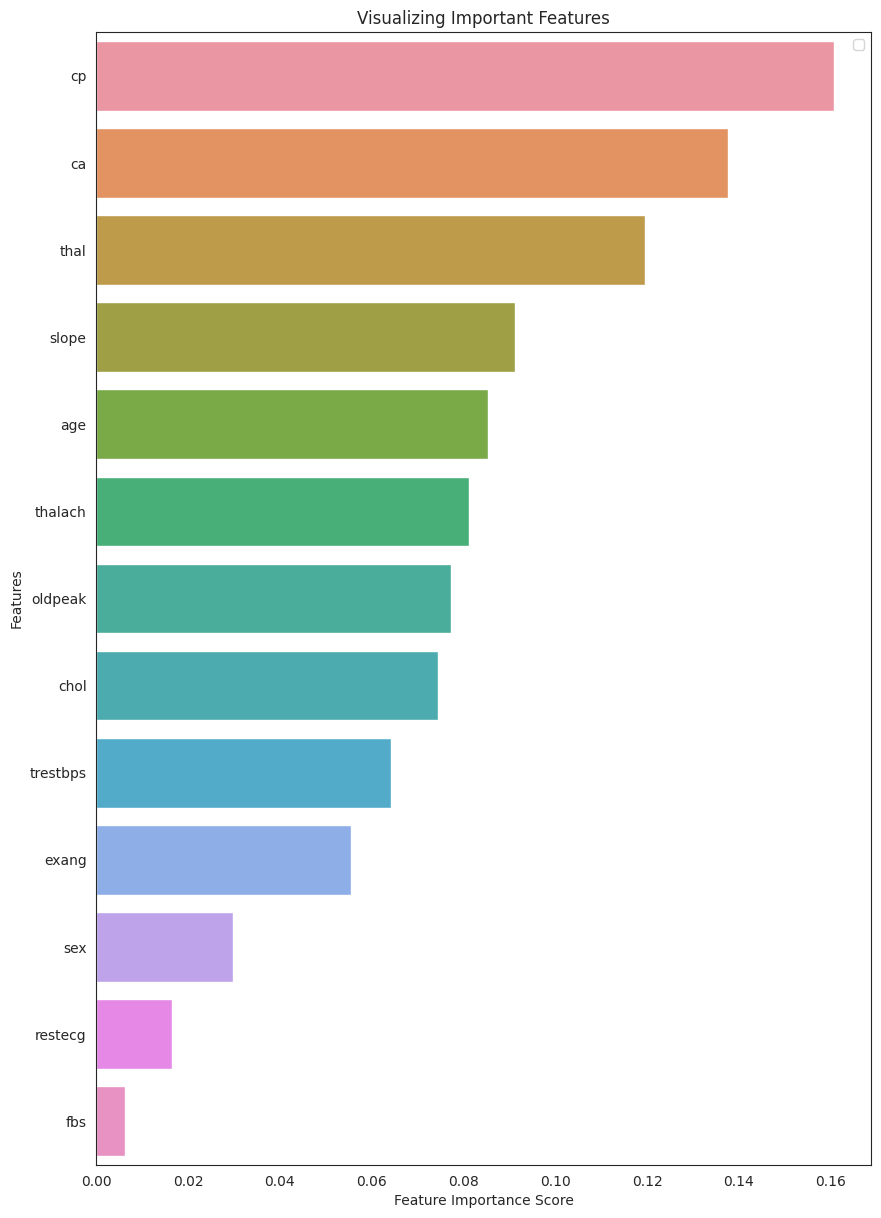

===========================Ada Boosting================================

Model performance on the test data set:
╒═══════════════╤══════════╕
│ Metric        │     Test │
╞═══════════════╪══════════╡
│ logloss       │ 6.71593  │
├───────────────┼──────────┤
│ Test accuracy │ 0.805556 │
├───────────────┼──────────┤
│ precision     │ 0.854167 │
├───────────────┼──────────┤
│ F1            │ 0.796117 │
├───────────────┼──────────┤
│ r2            │ 0.221955 │
├───────────────┼──────────┤
│ AUC           │ 0.80669  │
╘═══════════════╧══════════╛



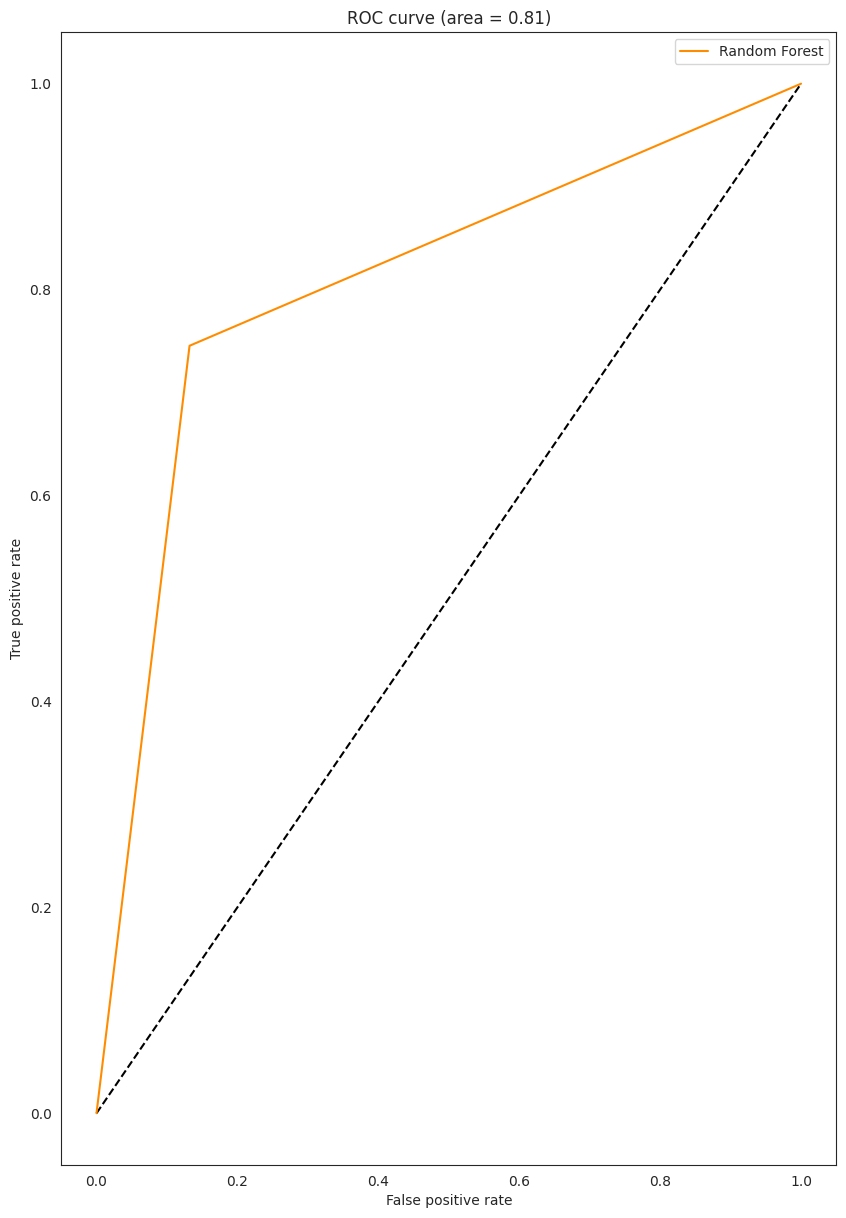

No handles with labels found to put in legend.


ROC for base model : Ada Boosting : 0.8066895368782162

Confusion Matrix : 
Confusion Matrix :  [[92 14]
 [28 82]]
Classification Accuracy :  0.8055555555555556
classification_error :  0.19444444444444445
sensitivity :  0.7454545454545455
specificity :  0.8679245283018868
false_positive_rate :  0.1320754716981132
precision :  0.8541666666666666

Imp Features : 


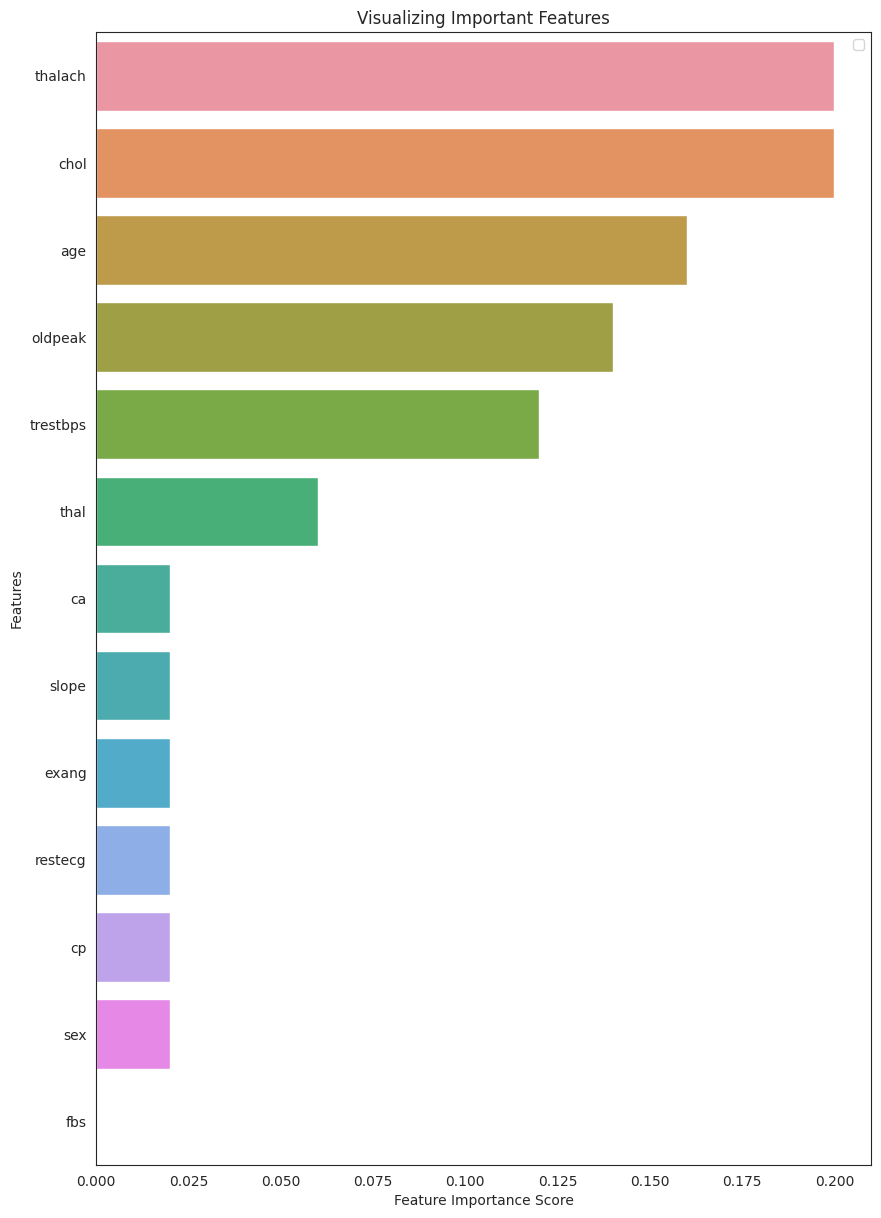

===========================XG Boosting================================

Model performance on the test data set:
╒═══════════════╤══════════╕
│ Metric        │     Test │
╞═══════════════╪══════════╡
│ logloss       │ 6.87583  │
├───────────────┼──────────┤
│ Test accuracy │ 0.800926 │
├───────────────┼──────────┤
│ precision     │ 0.838384 │
├───────────────┼──────────┤
│ F1            │ 0.794258 │
├───────────────┼──────────┤
│ r2            │ 0.203431 │
├───────────────┼──────────┤
│ AUC           │ 0.801801 │
╘═══════════════╧══════════╛



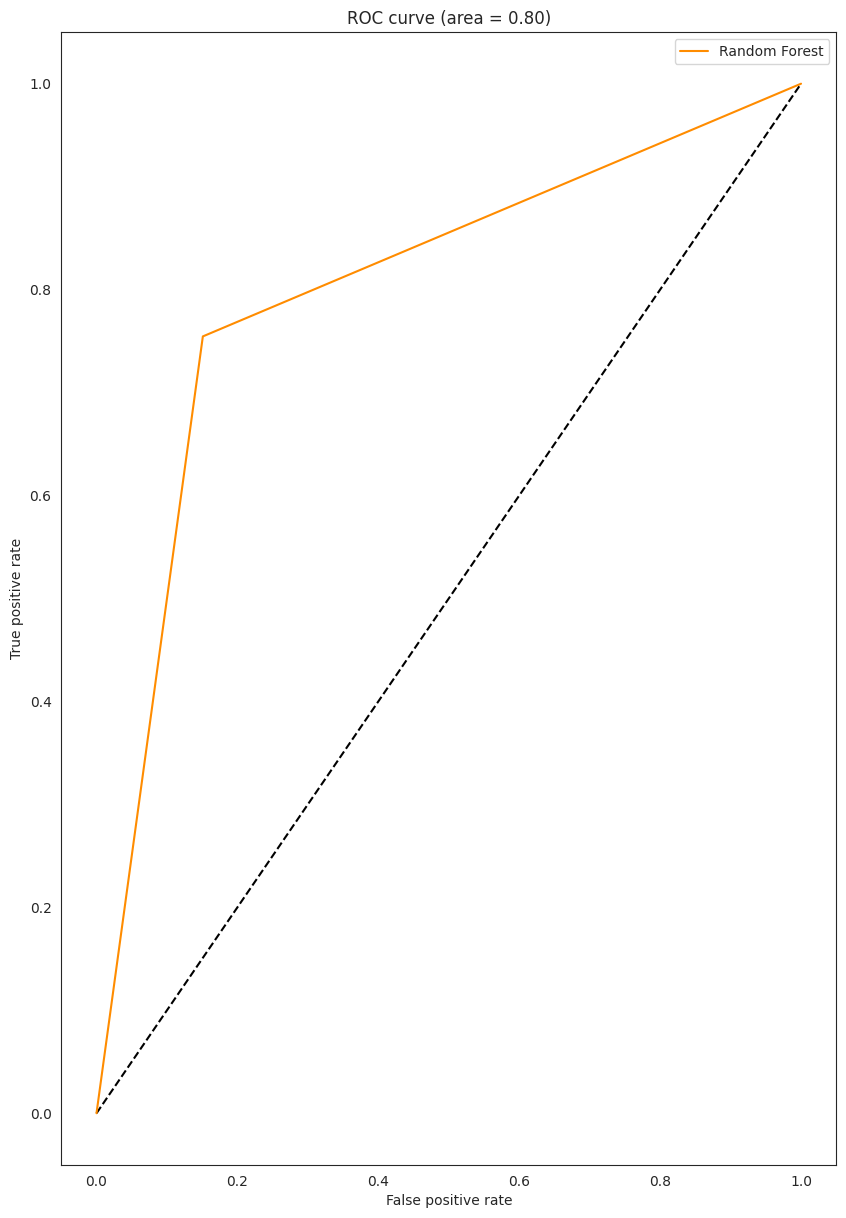

No handles with labels found to put in legend.


ROC for base model : XG Boosting : 0.8018010291595198

Confusion Matrix : 
Confusion Matrix :  [[90 16]
 [27 83]]
Classification Accuracy :  0.8009259259259259
classification_error :  0.19907407407407407
sensitivity :  0.7545454545454545
specificity :  0.8490566037735849
false_positive_rate :  0.1509433962264151
precision :  0.8383838383838383

Imp Features : 


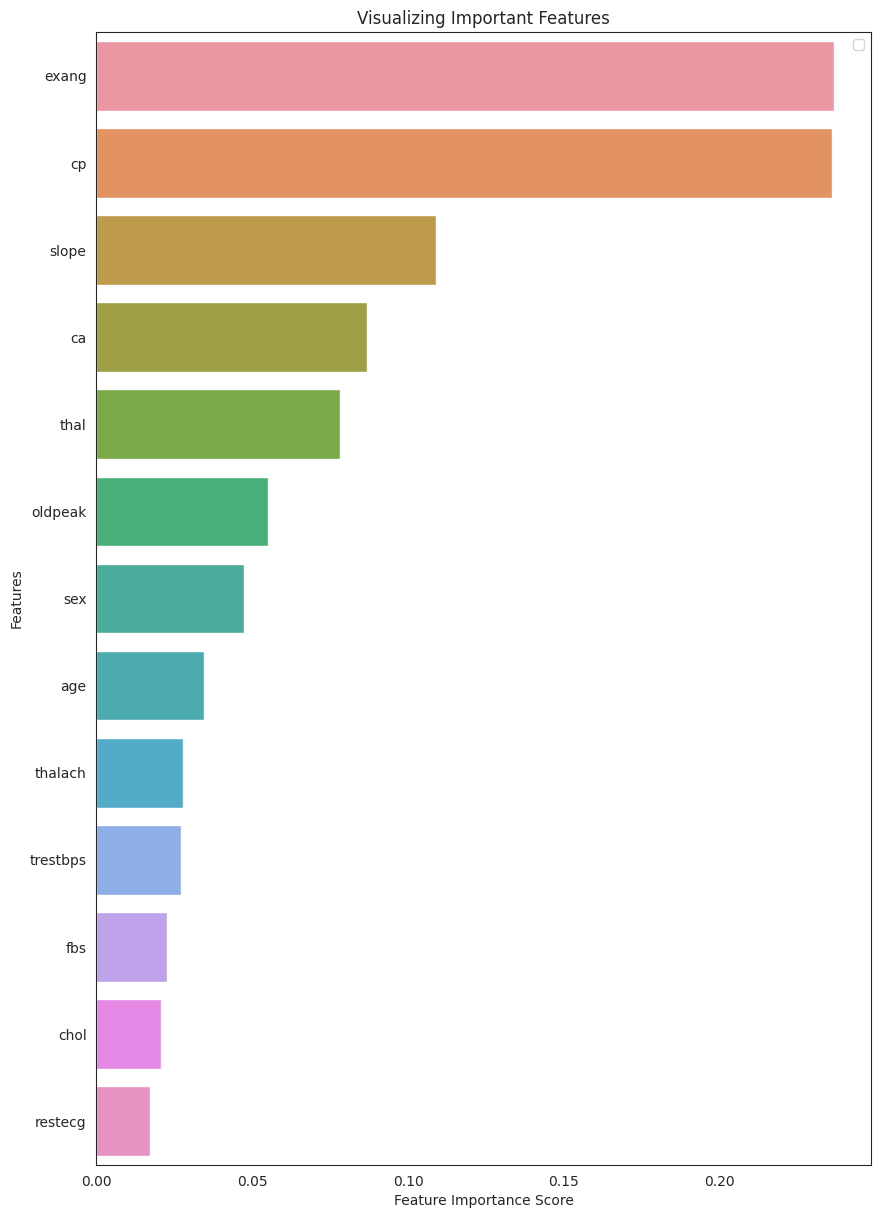

===========================bagging Classifier================================

Model performance on the test data set:
╒═══════════════╤══════════╕
│ Metric        │     Test │
╞═══════════════╪══════════╡
│ logloss       │ 6.39613  │
├───────────────┼──────────┤
│ Test accuracy │ 0.814815 │
├───────────────┼──────────┤
│ precision     │ 0.836538 │
├───────────────┼──────────┤
│ F1            │ 0.813084 │
├───────────────┼──────────┤
│ r2            │ 0.259005 │
├───────────────┼──────────┤
│ AUC           │ 0.815266 │
╘═══════════════╧══════════╛



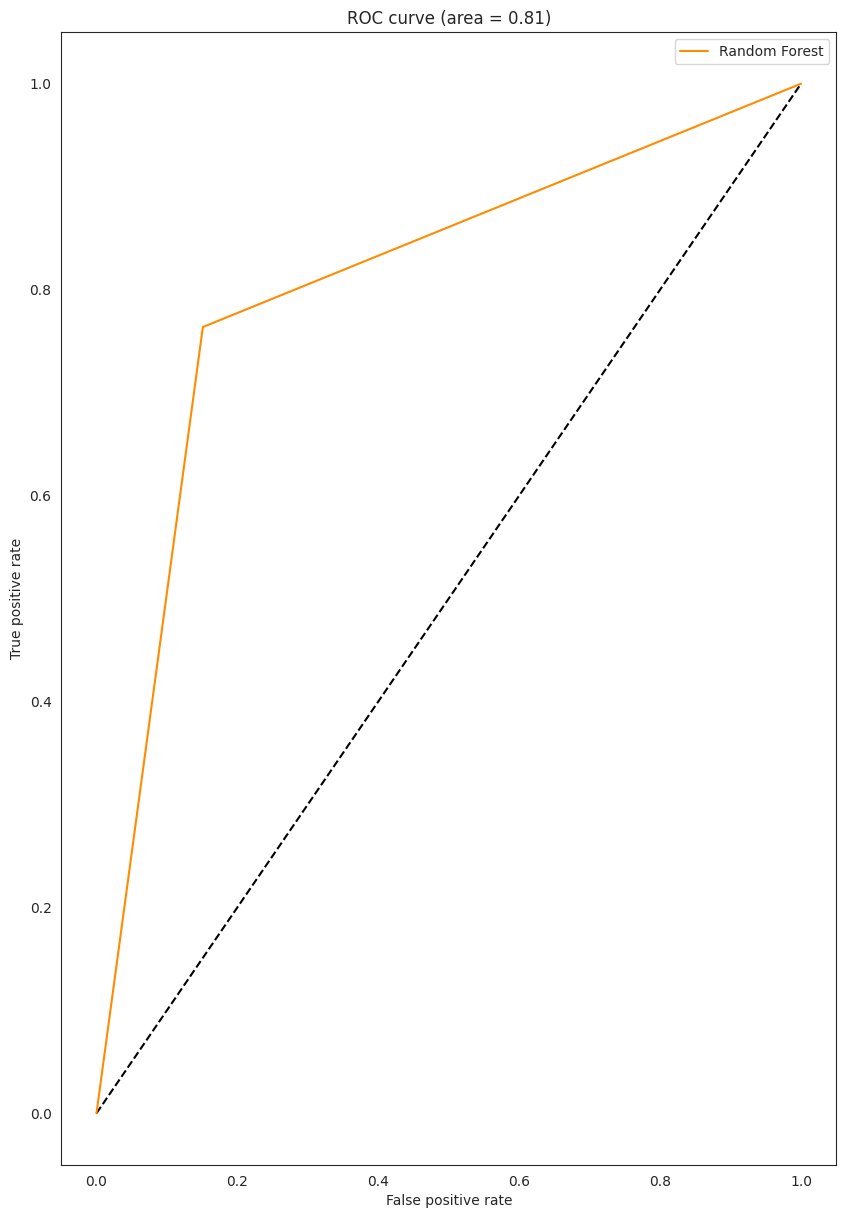

ROC for base model : bagging Classifier : 0.8063464837049743

Confusion Matrix : 
Confusion Matrix :  [[89 17]
 [23 87]]
Classification Accuracy :  0.8148148148148148
classification_error :  0.18518518518518517
sensitivity :  0.7909090909090909
specificity :  0.839622641509434
false_positive_rate :  0.16037735849056603
precision :  0.8365384615384616

Imp Features : 



In [129]:
models=[]
models.append(('Logistic Regression : LR', LogisticRegression()))
models.append(('Linear Discriminant Analysis : LDA ', LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('Decision Tree Classifier', DecisionTreeClassifier()))
models.append(('GaussianNB : NB', GaussianNB()))
models.append(('SVM',SVC()))
models.append(('Random Forest Classifier : RFC',RandomForestClassifier()))
models.append(('Ada Boosting',AdaBoostClassifier()))
models.append(('XG Boosting',XGBClassifier()))
models.append(('bagging Classifier',BaggingClassifier()))

		    
appended_data = []

for name, model in models:
    print("==========================="+name+"================================")
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    Metrics = Print_Metrics(model,y_test,X_test,y_pred,X_train,y_train,name)
    appended_data.append(Metrics)
    print('')
    print('ROC for base model : '+name+ ' : ' + str(evaluate(model,X_train,y_train, X_test, y_test)))
    print('')
    print('Confusion Matrix : ')
    Confusion_Matrix(y_test, y_pred)
    print('')
    try:
      print('Imp Features : ')
      imp_feature(model)
    except:
      print('')

Result_Accuracy = pd.concat(appended_data)

In [130]:
Result_Accuracy.sort_values(by='Test accuracy', ascending=False)

ModelName  logloss  ...     r2    AUC
0                                  SVM    6.076  ...  0.296  0.824
0             Logistic Regression : LR    6.236  ...  0.278  0.820
0       Random Forest Classifier : RFC    6.236  ...  0.278  0.820
0  Linear Discriminant Analysis : LDA     6.396  ...  0.259  0.815
0                   bagging Classifier    6.396  ...  0.259  0.815
0                         Ada Boosting    6.716  ...  0.222  0.807
0                          XG Boosting    6.876  ...  0.203  0.802
0                                  KNN    7.036  ...  0.185  0.797
0             Decision Tree Classifier    7.036  ...  0.185  0.796
0                      GaussianNB : NB    7.036  ...  0.185  0.797

[10 rows x 7 columns]

###**Decision based on Visulization**
* standardize the dataset to reduce the effect of differing distribution 

* Feature selection: highly correlated(negatively/positively) attributes with num will be better predictors
* removing the outliers--keep it


In [131]:
# split the dataset for above conversion 80%-20%
from sklearn.model_selection import train_test_split

array=Final_DF.values
X=array[:,0:13]
Y=array[:,13]
seed=7
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=seed)


##---------------------------------Do not Enter--------------------------------

# **Evaluate the baseline algorithm**
Spot check  a number of different classification algorithms:

**Linear Algorithm:** Logistic Regression, LDA

**Non-linear algorithms** Classification and regression Tree (CART), Support vector machine , Gaussian Naive Bayes (NB), and K-Nearest Neighbors (KNN)



In [132]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold


In [133]:
KNeighborsClassifier()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [134]:
num_folds=10
seed=7
scoring='accuracy'

In [135]:
from sklearn.ensemble import RandomForestClassifier
#Spot -check algorithm
models=[]
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM',SVC()))
models.append(('clf',RandomForestClassifier()))

results =[]
names= []
mean_acc=[]

for name, model in models:
  kfold=KFold(n_splits=num_folds,random_state=seed)
  cv_results= cross_val_score(model, X,Y,cv=kfold, scoring= 'accuracy')
  results.append(cv_results)
  mean_acc.append(cv_results.mean())
  names.append(name)
  msg= "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LR: 0.795149 (0.071778)
LDA: 0.800646 (0.073686)
KNN: 0.772868 (0.059106)
CART: 0.697555 (0.068412)
NB: 0.810544 (0.074189)
SVM: 0.802210 (0.066887)
clf: 0.806416 (0.078404)


In [136]:
mean_acc

[0.7951486697965572,
 0.8006455399061032,
 0.7728677621283255,
 0.6975547730829421,
 0.8105438184663537,
 0.8022104851330203,
 0.8064162754303601]

all the results have low variance and NB, SVM, and LR performing well 

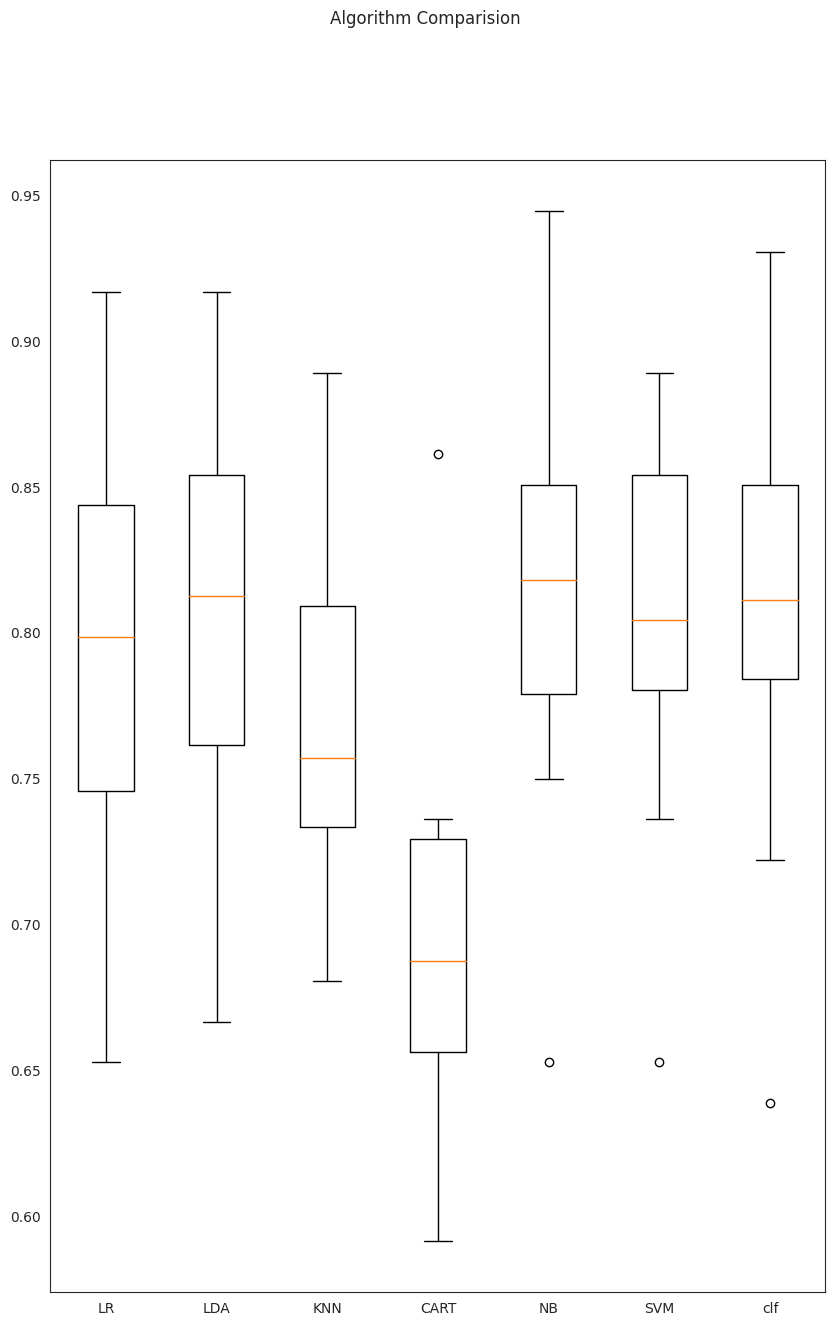

In [137]:
#compare algorithms
fig= plt.figure()
fig.suptitle('Algorithm Comparision')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### spot-Check using the pipeline and k-fold

In [138]:
# Standardize the dataset 
pipelines = [] 
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())]))) 
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
# spot-check using accuracy and cross val score
results =[]
names= []
for name, model in pipelines:
  kfold=KFold(n_splits=num_folds,random_state=seed)
  cv_results= cross_val_score(model, x_train,y_train,cv=kfold, scoring= 'accuracy')
  results.append(cv_results)
  names.append(name)
  msg= "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

ScaledLR: 0.832577 (0.037414)
ScaledLDA: 0.832547 (0.035090)
ScaledKNN: 0.830944 (0.034919)
ScaledCART: 0.749002 (0.034153)
ScaledNB: 0.837840 (0.044602)
ScaledSVM: 0.836177 (0.036742)


performance of the algorithms improved using the standardize in the pipeline


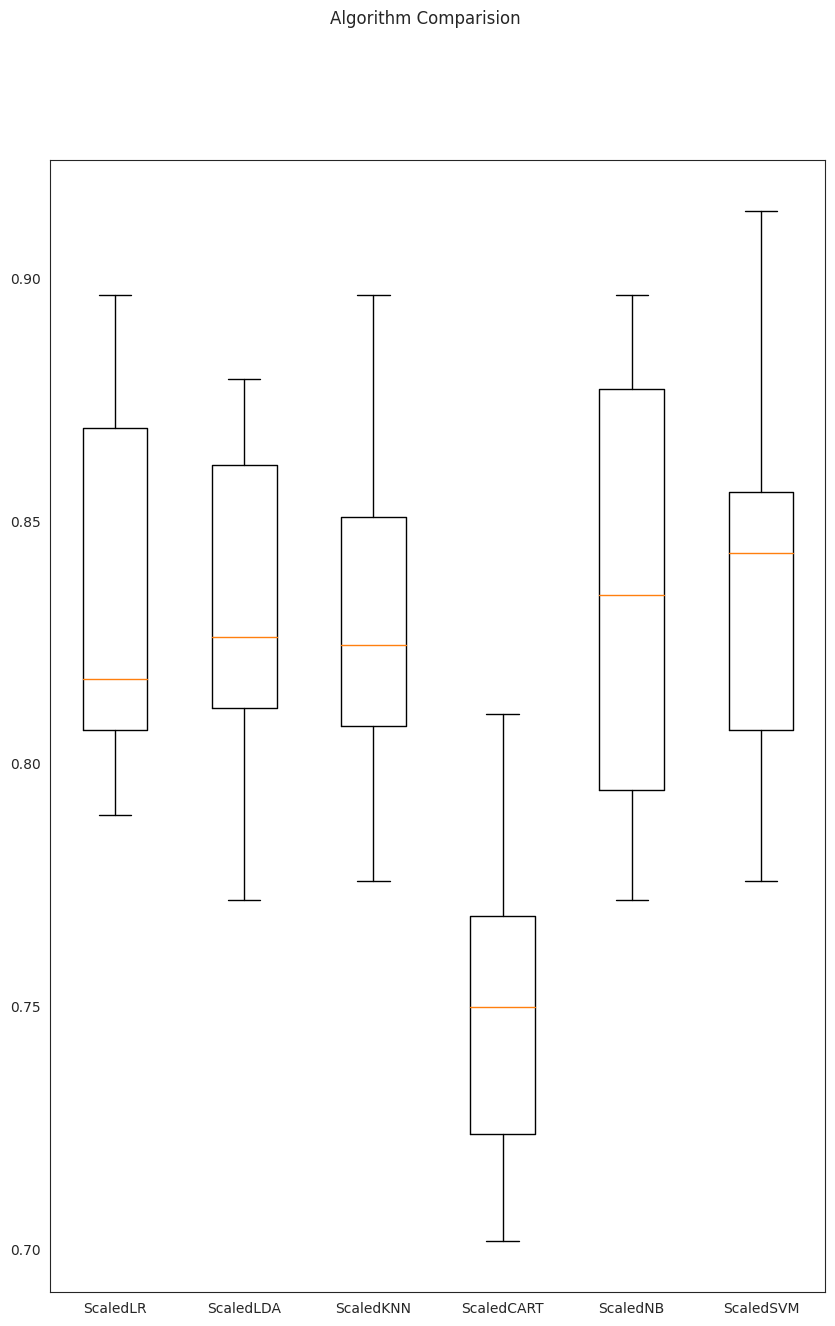

In [139]:
#compare algorithms
fig= plt.figure()
fig.suptitle('Algorithm Comparision')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#**Feature Selection**
* slelectKbest using chi2
* selectKbest using f_clssif
* RFE: recursive feature selection (selected 6 features)
* Extra tree classifier

###**SlectKbest Chi2**

In [140]:
#SelectKbest Using Chi2
from sklearn.feature_selection import SelectKBest
from numpy import set_printoptions
from sklearn.feature_selection import chi2
test=SelectKBest(score_func= chi2, k=3)
fit=test.fit(X,Y)
#summary scores
set_printoptions(precision=3)
print(fit.scores_)
features=fit.transform(X)
#summarize selected features
print(features[0:5, :])
column_selkbest=fit.scores_
column_selkbest
#["age", "sex", "cp", "trestbps","chol", "fbs", "restecg","thalach", "exang", "oldpeak", "slope", "ca", "thal"]

[  3.119  16.288  24.477   0.401   0.393   3.155   2.151   6.781 100.562
   3.863  22.577  44.894  67.534]
[[0.    0.    0.75 ]
 [1.    1.    0.   ]
 [1.    0.667 1.   ]
 [0.    0.    0.   ]
 [0.    0.    0.   ]]


array([  3.119,  16.288,  24.477,   0.401,   0.393,   3.155,   2.151,
         6.781, 100.562,   3.863,  22.577,  44.894,  67.534])

using Selectkbest:  sex, cp, exang, slope,ca,and thal

###**SlectKbest f_classif**

In [141]:
# SelectKbest f_classif
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# define feature selection
fs = SelectKBest(score_func=f_classif, k=6)
# apply feature selection
fit= fs.fit(X,Y)
#summary scores
set_printoptions(precision=3)
print(fit.scores_)
features=fit.transform(X)
#summarize selected features
print(features[0:5, :])
column_selkbest=fit.scores_
column_selkbest

[ 46.056  68.316 233.039   7.35   10.693   3.782   3.536 140.549 191.782
 118.154 113.655 179.006 242.264]
[[0.    0.634 0.    0.557 0.    0.75 ]
 [1.    0.338 1.    0.466 1.    0.   ]
 [1.    0.486 1.    0.591 0.667 1.   ]
 [0.667 0.894 0.    0.693 0.    0.   ]
 [0.333 0.789 0.    0.455 0.    0.   ]]


array([ 46.056,  68.316, 233.039,   7.35 ,  10.693,   3.782,   3.536,
       140.549, 191.782, 118.154, 113.655, 179.006, 242.264])

###**recursive feature selection**

In [142]:
#recursive Feature selection

# Feature Extraction with RFE

from sklearn.feature_selection import RFE

model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 6)
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)
column_RFE=fit.support_
column_RFE

Num Features: 6
Selected Features: [False False  True False False False False  True False  True  True  True
  True]
Feature Ranking: [5 4 1 6 3 8 7 1 2 1 1 1 1]


array([False, False,  True, False, False, False, False,  True, False,
        True,  True,  True,  True])

"oldpeak", "slope", "ca", "thal", cp, and chol, exang

###**Extra Tree classifier**

In [143]:
# Feature Importance with Extra Trees Classifier

from sklearn.ensemble import ExtraTreesClassifier
# feature extraction
model = ExtraTreesClassifier(n_estimators=13)
model.fit(X, Y)
column_ExTC= model.feature_importances_
print(column_ExTC)
#["age", "sex", "cp", "trestbps","chol", "fbs", "restecg","thalach", "exang", "oldpeak", "slope", "ca", "thal"]

[0.067 0.04  0.133 0.062 0.059 0.018 0.032 0.075 0.095 0.069 0.069 0.128
 0.155]


##**Summary selected features from above methods**

In [144]:

column_name= ["age", "sex", "cp", "trestbps","chol", "fbs", "restecg","thalach", "exang", "oldpeak", "slope", "ca", "thal"]
numpy_data = np.array([column_selkbest,column_RFE,column_ExTC])
df = pd.DataFrame(data=numpy_data, index=["SelectKbest", "RFE", "Extratreeclassifier"], columns=column_name)
df

age     sex       cp  ...    slope       ca     thal
SelectKbest          46.056  68.316  233.039  ...  113.655  179.006  242.264
RFE                   0.000   0.000    1.000  ...    1.000    1.000    1.000
Extratreeclassifier   0.067   0.040    0.133  ...    0.069    0.128    0.155

[3 rows x 13 columns]

based on all three methods: we can select sex, cp, chol, exang, slop, ca, thal
( I didnot pick thalach as it is highly correlated to thal)
another method to consider : PCA

use only selectKbest

# **Evaluation of the slected feature on the above baseline models**
* Hand selected features based on the comparison of all feature slection method
* SelectedKbest feature slection (Chi2)
* RFE on training dataset (**performing best**)
* Extratree classification (**performing best**)
* SelectKBest (F_classif) on training set
* PCA (...need to change X to X-train ,... got little lazy to run the entirefile)




In [145]:
# Hand selected features based on above three methods and their performance  on training dataset
sex_df=(Final_DF['sex'])
cp_df=(Final_DF['cp'])
chol_df=(Final_DF['chol'])
exang_df=(Final_DF['exang'])
slop_df=(Final_DF['slope'])
ca_df=(Final_DF['ca'])
thal_df=Final_DF['thal']
df_feat_sel = pd.concat([sex_df, cp_df,chol_df,exang_df,slop_df,ca_df,thal_df], axis=1)
array_feature_sel=df_feat_sel.values
array_feature_sel
#test-train
array=Final_DF.values

Y=array[:,13]
seed=7
x_fet_train, x_fet_test, y_fet_train, y_fet_test = train_test_split(array_feature_sel, Y, test_size=0.20, random_state=seed)
# Standardize the dataset 
pipelines = [] 
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())]))) 
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
# spot-check using accuracy and cross val score
results =[]
names= []
for name, model in pipelines:
  kfold=KFold(n_splits=num_folds,random_state=seed)
  cv_results= cross_val_score(model, x_fet_train,y_fet_train,cv=kfold, scoring= 'accuracy')
  results.append(cv_results)
  names.append(name)
  msg= "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

ScaledLR: 0.822172 (0.026518)
ScaledLDA: 0.823987 (0.034708)
ScaledKNN: 0.811706 (0.042386)
ScaledCART: 0.768149 (0.037497)
ScaledNB: 0.818663 (0.043650)
ScaledSVM: 0.827465 (0.033829)


In [146]:
# SelectKbest features and their performance  on training dataset
thalach_df=(Final_DF['thalach'])
cp_df=(Final_DF['cp'])
exang_df=(Final_DF['exang'])
slop_df=(Final_DF['slope'])
ca_df=(Final_DF['ca'])
thal_df=Final_DF['thal']
oldpeak_df=Final_DF['oldpeak']
df_feat_sel = pd.concat([thalach_df, cp_df,exang_df,slop_df,ca_df,thal_df,oldpeak_df], axis=1)
array_feature_sel=df_feat_sel.values
array_feature_sel
#test-train
array=Final_DF.values

Y=array[:,13]
seed=7
x_fet_train, x_fet_test, y_fet_train, y_fet_test = train_test_split(array_feature_sel, Y, test_size=0.20, random_state=seed)
# Standardize the dataset 
pipelines = [] 
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())]))) 
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
# spot-check using accuracy and cross val score
results =[]
names= []
for name, model in pipelines:
  kfold=KFold(n_splits=num_folds,random_state=seed)
  cv_results= cross_val_score(model, x_fet_train,y_fet_train,cv=kfold, scoring= 'accuracy')
  results.append(cv_results)
  names.append(name)
  msg= "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

ScaledLR: 0.832638 (0.033798)
ScaledLDA: 0.835995 (0.040779)
ScaledKNN: 0.801119 (0.057787)
ScaledCART: 0.756050 (0.061906)
ScaledNB: 0.834301 (0.045655)
ScaledSVM: 0.834362 (0.032038)


In [147]:
# RFE features selected on above three methods and their performance  on training dataset
oldpeak_df=(Final_DF['oldpeak'])
cp_df=(Final_DF['cp'])
chol_df=(Final_DF['chol'])
#exang_df=(Final_DF['exang'])
slop_df=(Final_DF['slope'])
ca_df=(Final_DF['ca'])
thal_df=Final_DF['thal']
df_feat_sel = pd.concat([oldpeak_df, cp_df,chol_df,slop_df,ca_df,thal_df], axis=1)
array_feature_sel=df_feat_sel.values
array_feature_sel
#test-train
array=Final_DF.values

Y=array[:,13]
seed=7
x_fet_train, x_fet_test, y_fet_train, y_fet_test = train_test_split(array_feature_sel, Y, test_size=0.20, random_state=seed)
# Standardize the dataset 
pipelines = [] 
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())]))) 
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
# spot-check using accuracy and cross val score
results =[]
names= []
for name, model in pipelines:
  kfold=KFold(n_splits=num_folds,random_state=seed)
  cv_results= cross_val_score(model, x_fet_train,y_fet_train,cv=kfold, scoring= 'accuracy')
  results.append(cv_results)
  names.append(name)
  msg= "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

ScaledLR: 0.822293 (0.029062)
ScaledLDA: 0.824047 (0.027517)
ScaledKNN: 0.813400 (0.041460)
ScaledCART: 0.761071 (0.052941)
ScaledNB: 0.827435 (0.041789)
ScaledSVM: 0.841349 (0.033964)


In [148]:
# Extratreeclassifier features selected on above three methods and their performance  on training dataset
oldpeak_df=(Final_DF['oldpeak'])
cp_df=(Final_DF['cp'])
chol_df=(Final_DF['chol'])
exang_df=(Final_DF['exang'])
#slop_df=(Final_DF['slope'])
ca_df=(Final_DF['ca'])
thal_df=Final_DF['thal']
df_feat_sel = pd.concat([oldpeak_df, cp_df,chol_df,slop_df,ca_df,thal_df], axis=1)
array_feature_sel=df_feat_sel.values
array_feature_sel
#test-train
array=Final_DF.values

Y=array[:,13]
seed=7
x_fet_train, x_fet_test, y_fet_train, y_fet_test = train_test_split(array_feature_sel, Y, test_size=0.20, random_state=seed)
# Standardize the dataset 
pipelines = [] 
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())]))) 
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
# spot-check using accuracy and cross val score
results =[]
names= []
for name, model in pipelines:
  kfold=KFold(n_splits=num_folds,random_state=seed)
  cv_results= cross_val_score(model, x_fet_train,y_fet_train,cv=kfold, scoring= 'accuracy')
  results.append(cv_results)
  names.append(name)
  msg= "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

ScaledLR: 0.822293 (0.029062)
ScaledLDA: 0.824047 (0.027517)
ScaledKNN: 0.813400 (0.041460)
ScaledCART: 0.745342 (0.065945)
ScaledNB: 0.827435 (0.041789)
ScaledSVM: 0.841349 (0.033964)


In [149]:
#SelectkBest using classif features selected on above three methods and their performance  on training dataset
#[ "cp", thalach", "exang", "oldpeak", "slope", "ca", "thal"]
oldpeak_df=(Final_DF['oldpeak'])
cp_df=(Final_DF['cp'])
chol_df=(Final_DF['thalach'])
exang_df=(Final_DF['exang'])
slop_df=(Final_DF['slope'])
ca_df=(Final_DF['ca'])
thal_df=Final_DF['thal']
df_feat_sel = pd.concat([oldpeak_df, cp_df,chol_df,slop_df,ca_df,thal_df], axis=1)
array_feature_sel=df_feat_sel.values
array_feature_sel
#test-train
array=Final_DF.values

Y=array[:,13]
seed=7
x_fet_train, x_fet_test, y_fet_train, y_fet_test = train_test_split(array_feature_sel, Y, test_size=0.20, random_state=seed)
# Standardize the dataset 
pipelines = [] 
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())]))) 
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
# spot-check using accuracy and cross val score
results =[]
names= []
for name, model in pipelines:
  kfold=KFold(n_splits=num_folds,random_state=seed)
  cv_results= cross_val_score(model, x_fet_train,y_fet_train,cv=kfold, scoring= 'accuracy')
  results.append(cv_results)
  names.append(name)
  msg= "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

ScaledLR: 0.825681 (0.029625)
ScaledLDA: 0.830913 (0.029642)
ScaledKNN: 0.820357 (0.040691)
ScaledCART: 0.743769 (0.070073)
ScaledNB: 0.832577 (0.036611)
ScaledSVM: 0.825650 (0.037085)


#**PCA for feature selection**

In [150]:

# evaluate pca with logistic regression algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

# define the pipeline
steps = [('Scaler', StandardScaler()),('pca', PCA(n_components=3)), ('m', SVC())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=1)
n_scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.821 (0.040)
